## Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
import shutil
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [5]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Load the datasets

In [6]:
file_path = "/content/drive/MyDrive/Technical Content/Data"

fd_df = pd.read_csv(os.path.join(file_path,"Fraud_Data.csv"))
fd_df.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [7]:
zip_path = "/content/drive/MyDrive/Technical Content/Data/creditcard.csv.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content")
csv_file = [f for f in os.listdir("/content") if f.endswith(".csv")][0]
cc_df = pd.read_csv(f"/content/{csv_file}")
cc_df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
ip_df = pd.read_csv(os.path.join(file_path,"IpAddress_to_Country.csv"))
ip_df.head()


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


## general information about each dataset

In [ ]:
fd_df.isnull().sum()

,0
user_id,0
signup_time,0
purchase_time,0
purchase_value,0
device_id,0
source,0
browser,0
sex,0
age,0
ip_address,0


In [ ]:
cc_df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
ip_df.isnull().sum()

,0
lower_bound_ip_address,0
upper_bound_ip_address,0
country,0


## 1.	Handle Missing Values with impution

In [13]:
dfs=[fd_df,ip_df,cc_df]
for df in dfs:
   for column in df.select_dtypes(include=["object"]).columns:   # impute categorical columns with mode
       if df[column].isnull().any():
          df[column].fillna(df[column].mode()[0],inplace=True)
for df in dfs:
    for column in df.select_dtypes(include=["float64","int64"]).columns:  #  # impute numerical  columns with mean value
        if df[column].isnull().any():
            df[column].fillna(df[column].mean(),inplace=True)

## 2. Data Cleaning

In [15]:
dfs=[fd_df,ip_df,cc_df]
for df in dfs:
    df.drop_duplicates(inplace=True)  # drop duplicates from each dataset

In [14]:
# change data types of some columns to the approprate one
time_columns=["purchase_time","signup_time"]
for column in time_columns:
    fd_df[column]=pd.to_datetime(fd_df[column])

# Drop rows with missing IPs
fd_df = fd_df.dropna(subset=['ip_address'])
# Convert to integer safely
fd_df['ip_address'] = fd_df['ip_address'].astype('int64')

fd_df['user_id'] = fd_df['user_id'].astype(str)
fd_df['device_id'] = fd_df['device_id'].astype(str)

ip_df['lower_bound_ip_address'] = ip_df['lower_bound_ip_address'].astype('Int64')


## 3.	Exploratory Data Analysis (EDA)

## 3.1 Univariate analysis


 Summary for purchase_value:
 count    151112.000000
mean         36.935372
std          18.322762
min           9.000000
25%          22.000000
50%          35.000000
75%          49.000000
max         154.000000
Name: purchase_value, dtype: float64


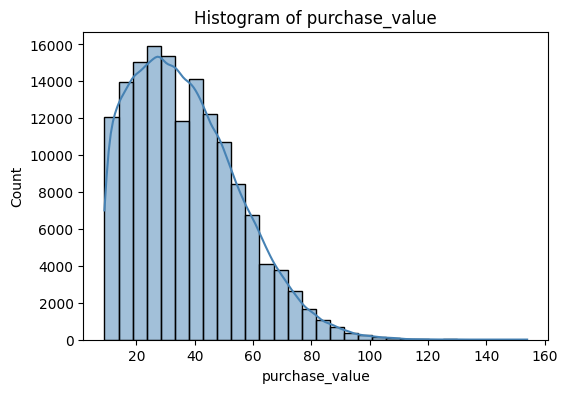

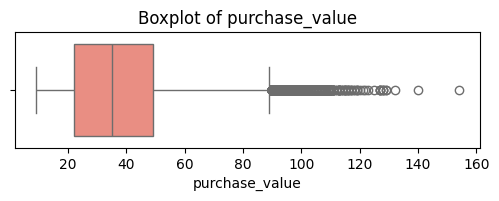


 Summary for age:
 count    151112.000000
mean         33.140704
std           8.617733
min          18.000000
25%          27.000000
50%          33.000000
75%          39.000000
max          76.000000
Name: age, dtype: float64


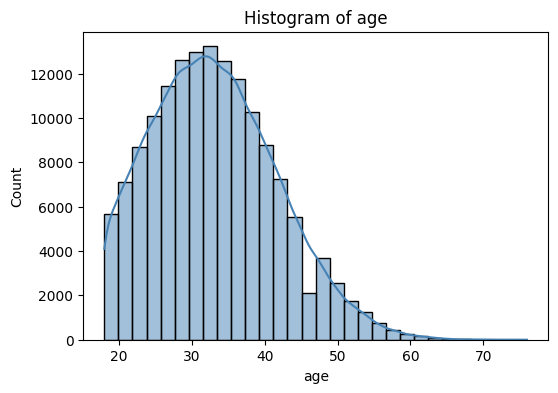

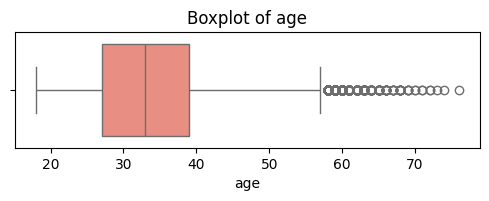


 Summary for ip_address:
 count    1.511120e+05
mean     2.152145e+09
std      1.248497e+09
min      5.209300e+04
25%      1.085934e+09
50%      2.154770e+09
75%      3.243258e+09
max      4.294850e+09
Name: ip_address, dtype: float64


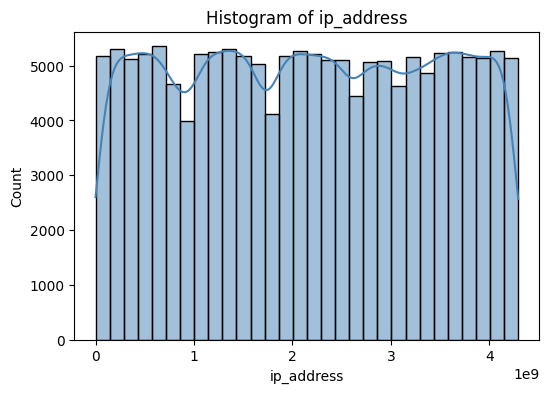

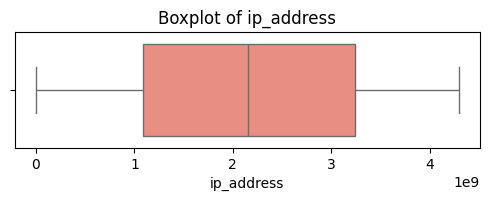


 Summary for class:
 count    151112.000000
mean          0.093646
std           0.291336
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: class, dtype: float64


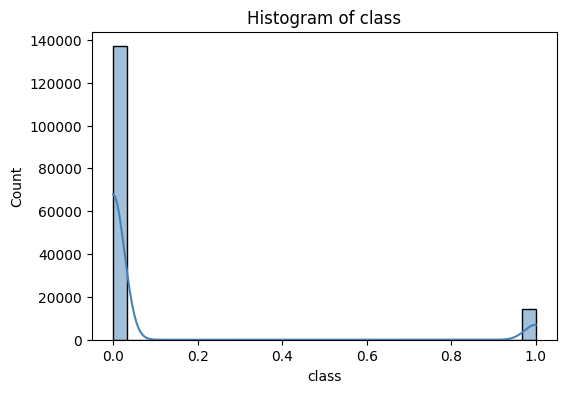

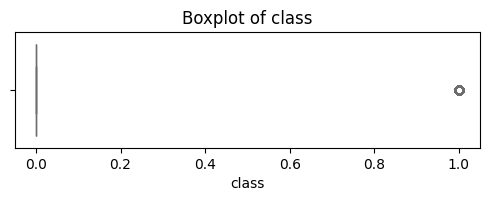


 Value Counts for user_id:
 user_id
138208    1
22058     1
333320    1
1359      1
150084    1
         ..
79203     1
73884     1
199700    1
182338    1
159045    1
Name: count, Length: 151112, dtype: int64


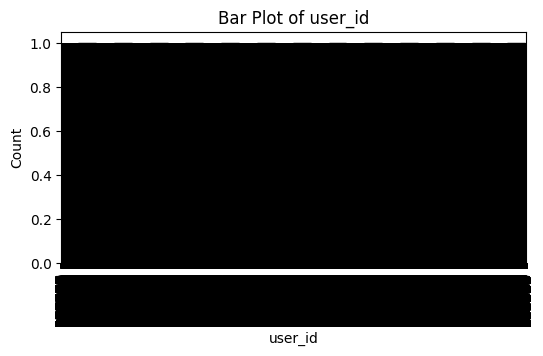


 Value Counts for device_id:
 device_id
NGQCKIADMZORL    20
EQYVNEGOFLAWK    20
ZUSVMDEZRBDTX    20
ITUMJCKWEYNDD    20
CQTUVBYIWWWBC    20
                 ..
FCNAWFVSIVERS     1
YJTDUABIOORFL     1
TSECZNFQBXDMY     1
SVJBDYTAQQHLZ     1
VRDEFBOZCVCWC     1
Name: count, Length: 137956, dtype: int64


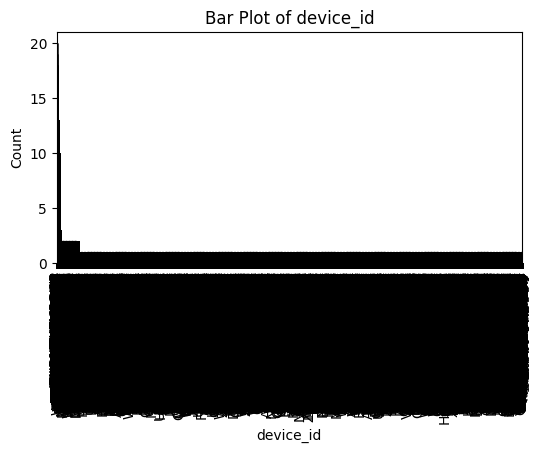


 Value Counts for source:
 source
SEO       60615
Ads       59881
Direct    30616
Name: count, dtype: int64


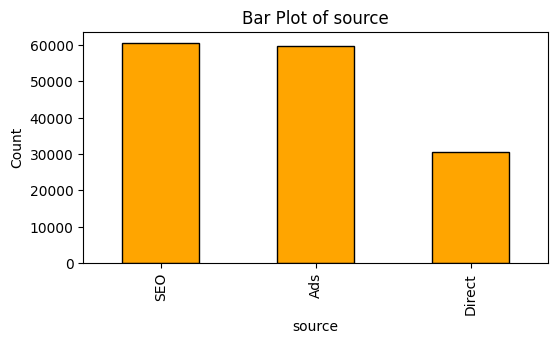


 Value Counts for browser:
 browser
Chrome     61432
IE         36727
Safari     24667
FireFox    24610
Opera       3676
Name: count, dtype: int64


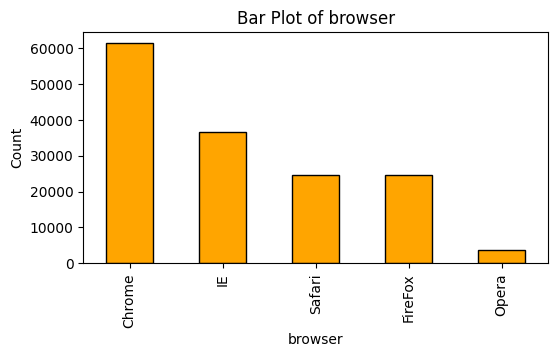


 Value Counts for sex:
 sex
M    88293
F    62819
Name: count, dtype: int64


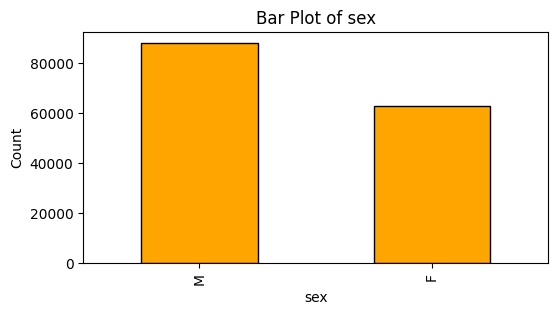


 Missing Values in fd_df:
 user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


In [ ]:
# for Fraud Detection Data

numeric_cols = fd_df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    print(f"\n Summary for {col}:\n", fd_df[col].describe())
    plt.figure(figsize=(6,4))
    sns.histplot(fd_df[col], kde=True, bins=30, color='steelblue')
    plt.title(f"Histogram of {col}")
    plt.show()

    plt.figure(figsize=(6,1.5))
    sns.boxplot(x=fd_df[col], color='salmon')
    plt.title(f"Boxplot of {col}")
    plt.show()

cat_cols = fd_df.select_dtypes(include=['object']).columns

for col in cat_cols:
    print(f"\n Value Counts for {col}:\n", fd_df[col].value_counts())
    plt.figure(figsize=(6,3))
    fd_df[col].value_counts().plot(kind='bar', color='orange', edgecolor='black')
    plt.title(f"Bar Plot of {col}")
    plt.ylabel("Count")
    plt.show()

print("\n Missing Values in fd_df:\n", fd_df.isnull().sum())


\ Summary for lower_bound_ip_address:
 count             138846.0
mean     2724531562.515996
std        897521519.71161
min             16777216.0
25%           1919930368.0
50%           3230887296.0
75%           3350465280.0
max           3758096128.0
Name: lower_bound_ip_address, dtype: Float64


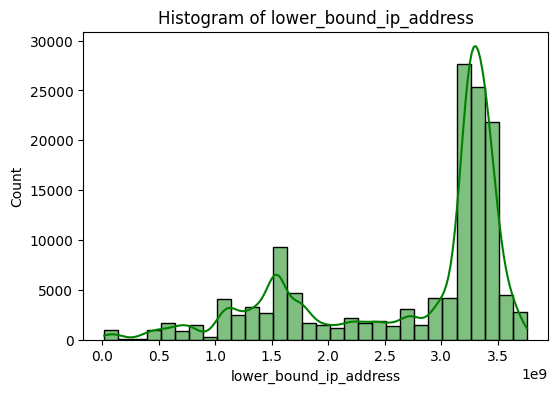

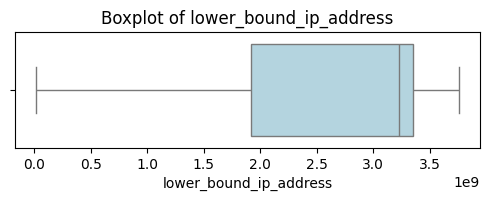

\ Summary for upper_bound_ip_address:
 count    1.388460e+05
mean     2.724557e+09
std      8.974979e+08
min      1.677747e+07
25%      1.920008e+09
50%      3.230888e+09
75%      3.350466e+09
max      3.758096e+09
Name: upper_bound_ip_address, dtype: float64


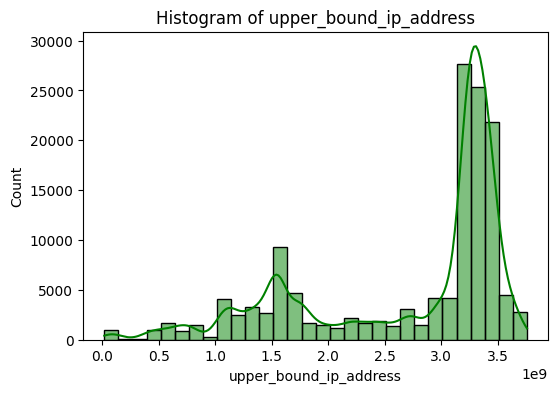

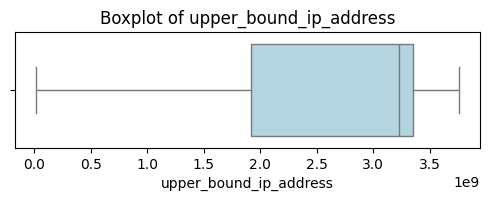


 Value Counts for Country:
 country
United States            46868
Canada                    6989
Russian Federation        6739
Australia                 6316
Germany                   5999
                         ...  
Sao Tome and Principe        1
Tuvalu                       1
Cook Islands                 1
American Samoa               1
Saint Lucia                  1
Name: count, Length: 235, dtype: int64


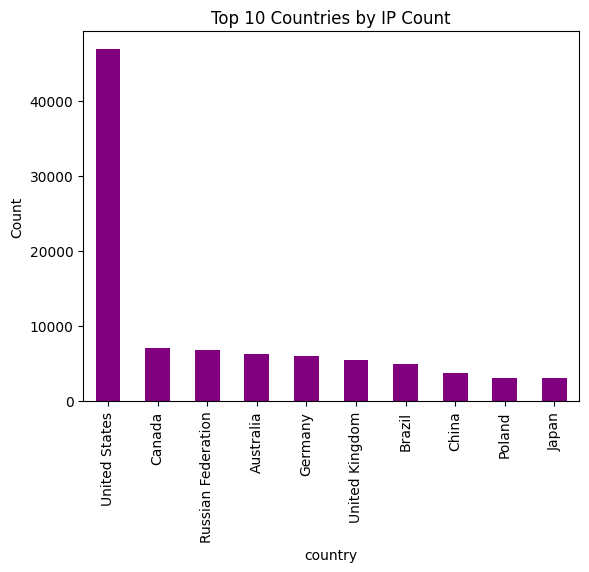


 Missing Values in ip_df:
 lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64


In [ ]:
#  NUMERICAL
numeric_cols = ip_df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    print(f"\ Summary for {col}:\n", ip_df[col].describe())
    plt.figure(figsize=(6,4))
    sns.histplot(ip_df[col], kde=True, bins=30, color='green')
    plt.title(f"Histogram of {col}")
    plt.show()

    plt.figure(figsize=(6,1.5))
    sns.boxplot(x=ip_df[col], color='lightblue')
    plt.title(f"Boxplot of {col}")
    plt.show()

#  CATEGORICAL
print("\n Value Counts for Country:\n", ip_df['country'].value_counts())
ip_df['country'].value_counts().nlargest(10).plot(kind='bar', color='purple')
plt.title("Top 10 Countries by IP Count")
plt.ylabel("Count")
plt.show()


print("\n Missing Values in ip_df:\n", ip_df.isnull().sum())



 Summary for Time:
 count    283726.000000
mean      94811.077600
std       47481.047891
min           0.000000
25%       54204.750000
50%       84692.500000
75%      139298.000000
max      172792.000000
Name: Time, dtype: float64


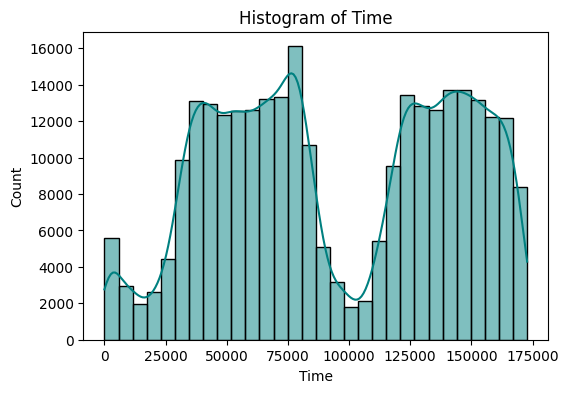

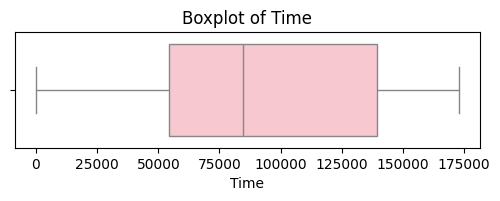


 Summary for V1:
 count    283726.000000
mean          0.005917
std           1.948026
min         -56.407510
25%          -0.915951
50%           0.020384
75%           1.316068
max           2.454930
Name: V1, dtype: float64


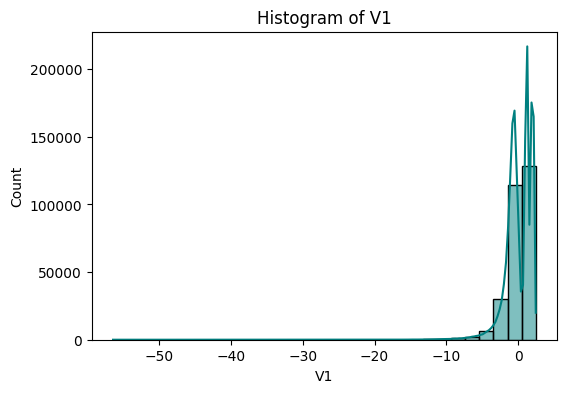

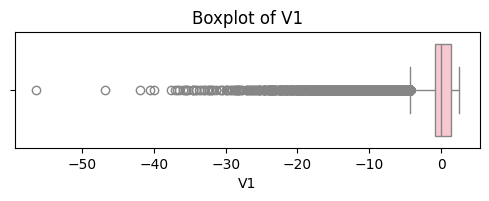


 Summary for V2:
 count    283726.000000
mean         -0.004135
std           1.646703
min         -72.715728
25%          -0.600321
50%           0.063949
75%           0.800283
max          22.057729
Name: V2, dtype: float64


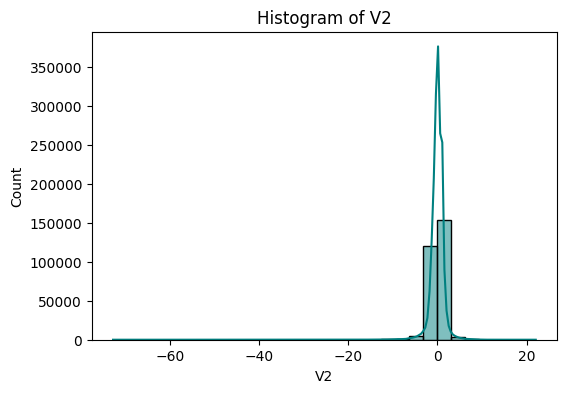

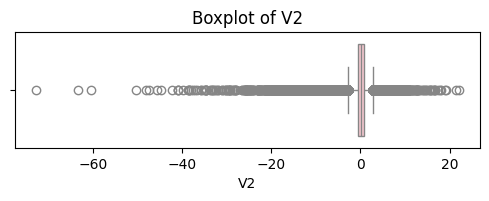


 Summary for V3:
 count    283726.000000
mean          0.001613
std           1.508682
min         -48.325589
25%          -0.889682
50%           0.179963
75%           1.026960
max           9.382558
Name: V3, dtype: float64


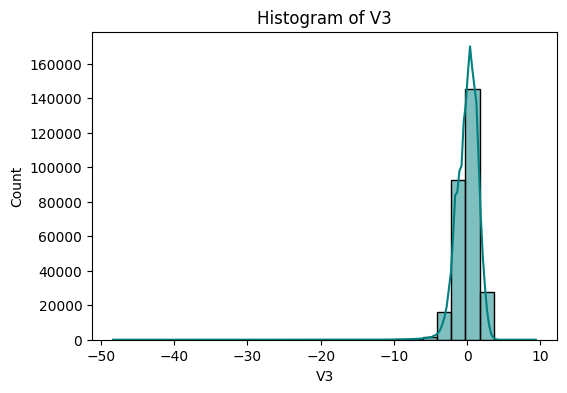

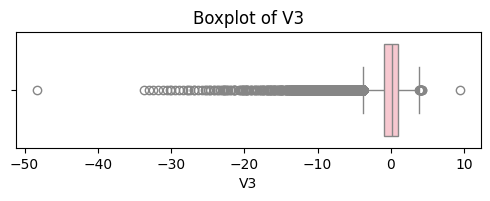


 Summary for V4:
 count    283726.000000
mean         -0.002966
std           1.414184
min          -5.683171
25%          -0.850134
50%          -0.022248
75%           0.739647
max          16.875344
Name: V4, dtype: float64


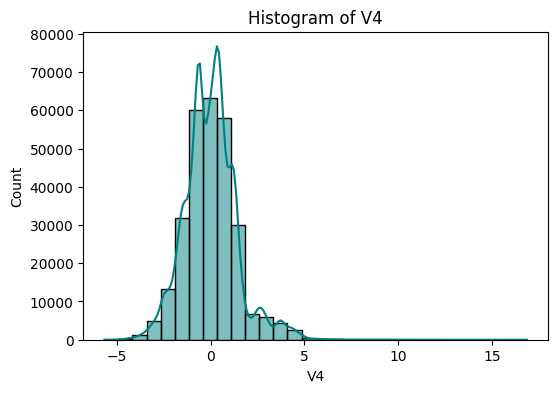

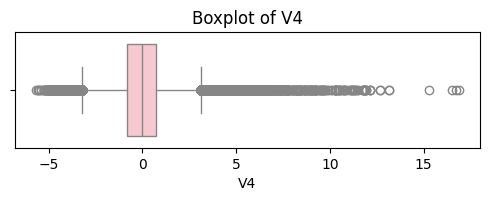


 Summary for V5:
 count    283726.000000
mean          0.001828
std           1.377008
min        -113.743307
25%          -0.689830
50%          -0.053468
75%           0.612218
max          34.801666
Name: V5, dtype: float64


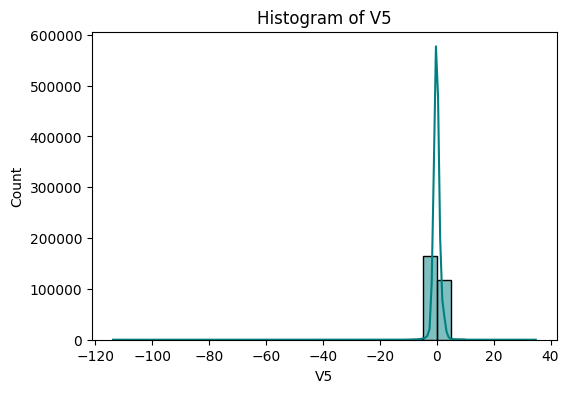

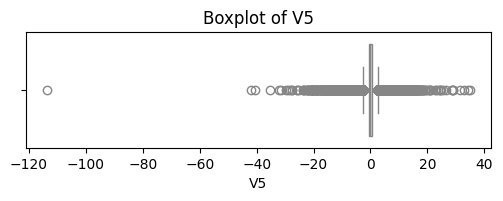


 Summary for V6:
 count    283726.000000
mean         -0.001139
std           1.331931
min         -26.160506
25%          -0.769031
50%          -0.275168
75%           0.396792
max          73.301626
Name: V6, dtype: float64


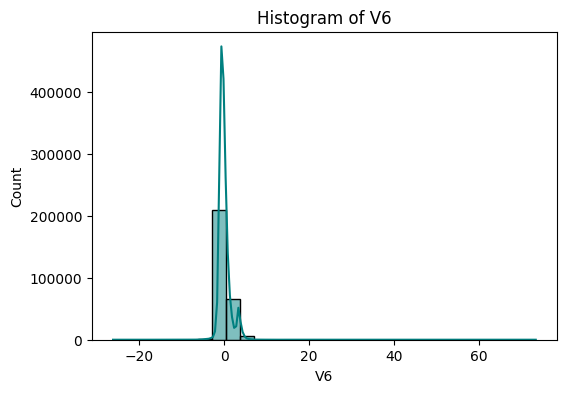

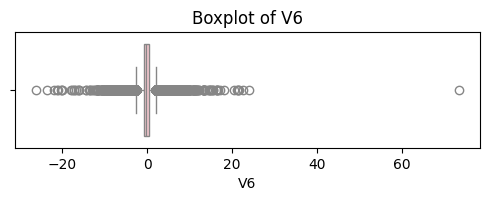


 Summary for V7:
 count    283726.000000
mean          0.001801
std           1.227664
min         -43.557242
25%          -0.552509
50%           0.040859
75%           0.570474
max         120.589494
Name: V7, dtype: float64


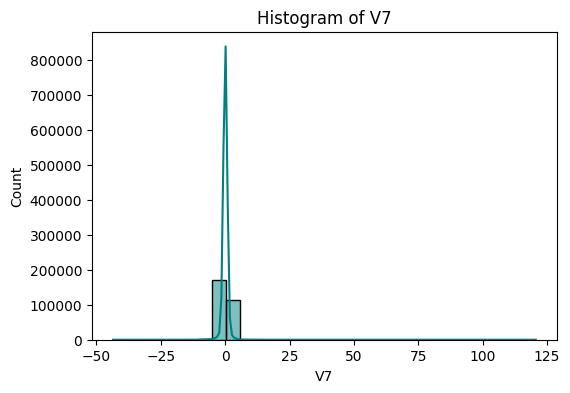

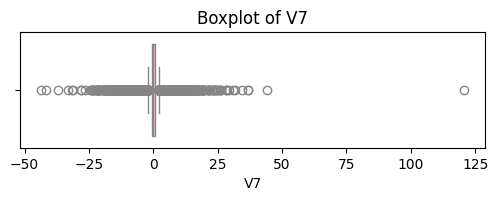


 Summary for V8:
 count    283726.000000
mean         -0.000854
std           1.179054
min         -73.216718
25%          -0.208828
50%           0.021898
75%           0.325704
max          20.007208
Name: V8, dtype: float64


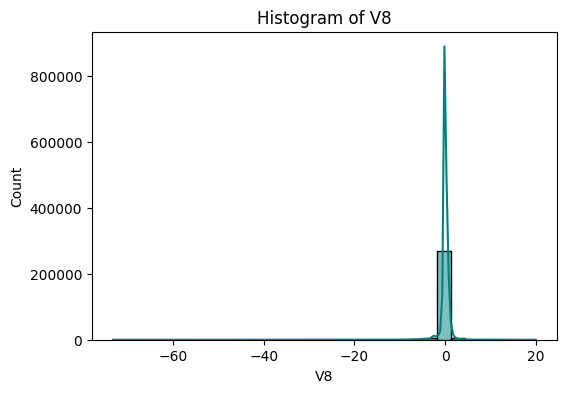

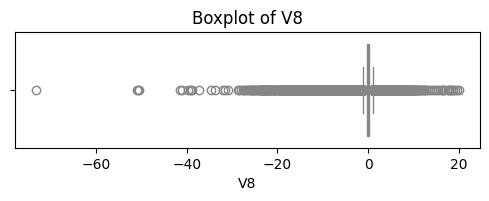


 Summary for V9:
 count    283726.000000
mean         -0.001596
std           1.095492
min         -13.434066
25%          -0.644221
50%          -0.052596
75%           0.595977
max          15.594995
Name: V9, dtype: float64


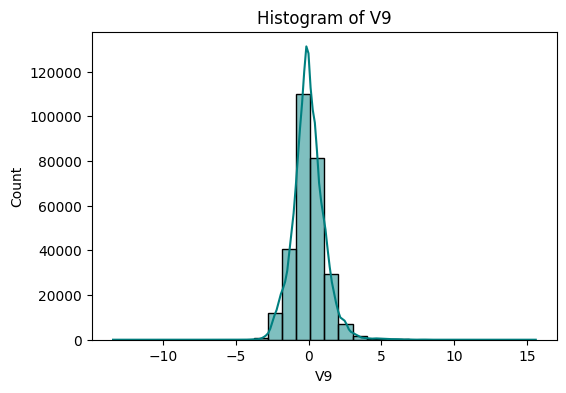

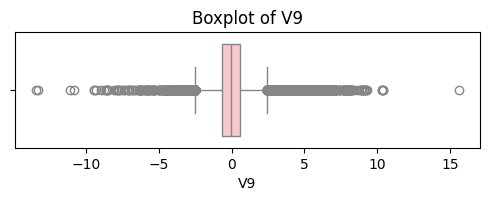


 Summary for V10:
 count    283726.000000
mean         -0.001441
std           1.076407
min         -24.588262
25%          -0.535578
50%          -0.093237
75%           0.453619
max          23.745136
Name: V10, dtype: float64


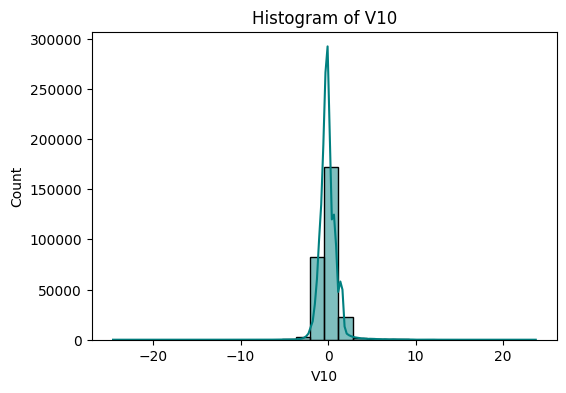

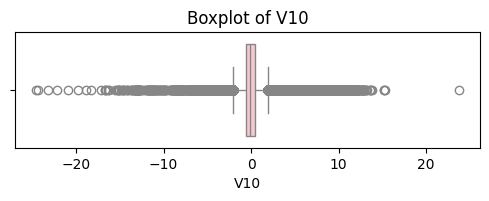


 Summary for V11:
 count    283726.000000
mean          0.000202
std           1.018720
min          -4.797473
25%          -0.761649
50%          -0.032306
75%           0.739579
max          12.018913
Name: V11, dtype: float64


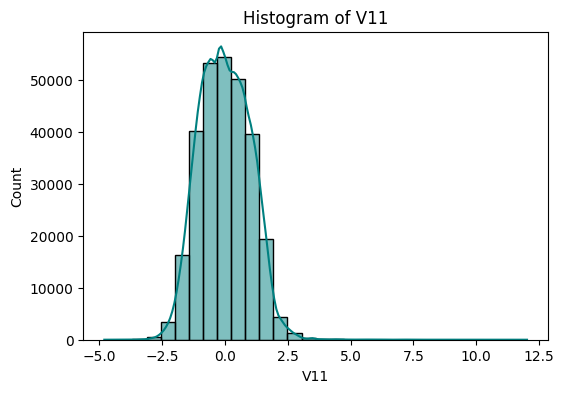

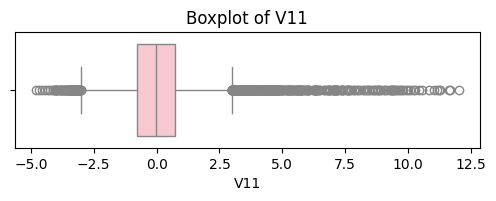


 Summary for V12:
 count    283726.000000
mean         -0.000715
std           0.994674
min         -18.683715
25%          -0.406198
50%           0.139072
75%           0.616976
max           7.848392
Name: V12, dtype: float64


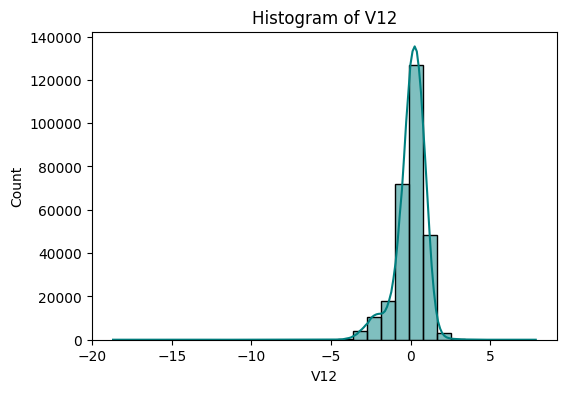

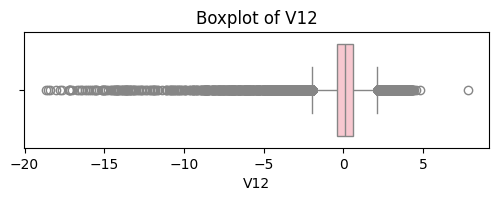


 Summary for V13:
 count    283726.000000
mean          0.000603
std           0.995430
min          -5.791881
25%          -0.647862
50%          -0.012927
75%           0.663178
max           7.126883
Name: V13, dtype: float64


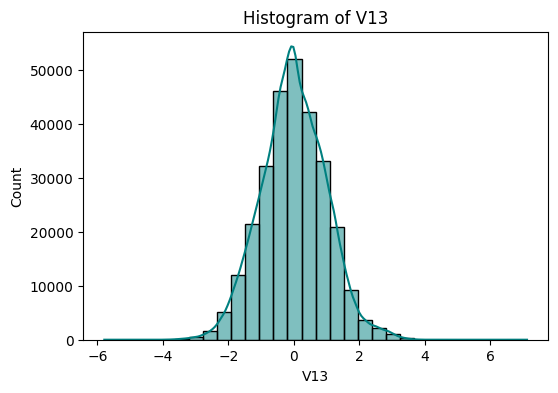

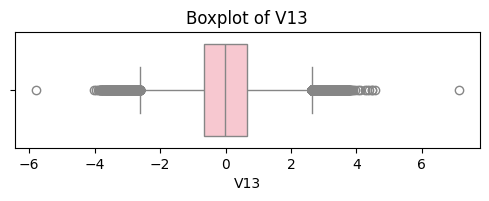


 Summary for V14:
 count    283726.000000
mean          0.000252
std           0.952215
min         -19.214325
25%          -0.425732
50%           0.050209
75%           0.492336
max          10.526766
Name: V14, dtype: float64


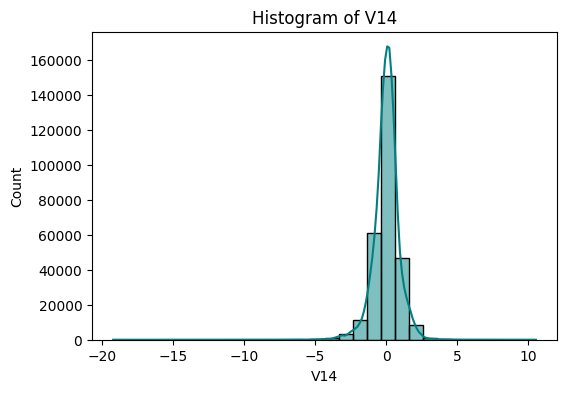

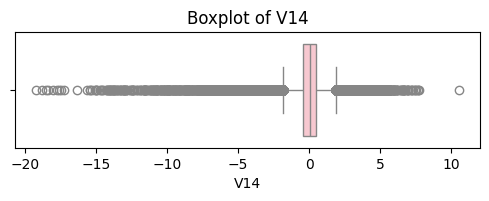


 Summary for V15:
 count    283726.000000
mean          0.001043
std           0.914894
min          -4.498945
25%          -0.581452
50%           0.049299
75%           0.650104
max           8.877742
Name: V15, dtype: float64


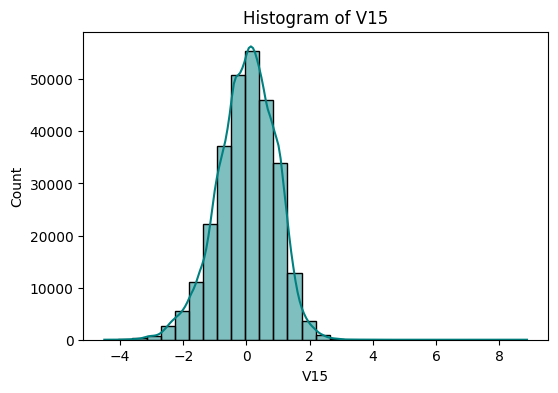

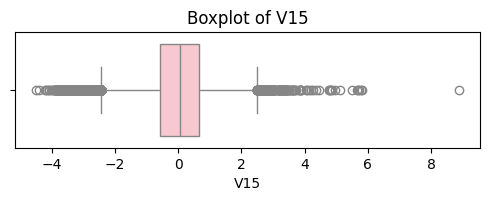


 Summary for V16:
 count    283726.000000
mean          0.001162
std           0.873696
min         -14.129855
25%          -0.466860
50%           0.067119
75%           0.523512
max          17.315112
Name: V16, dtype: float64


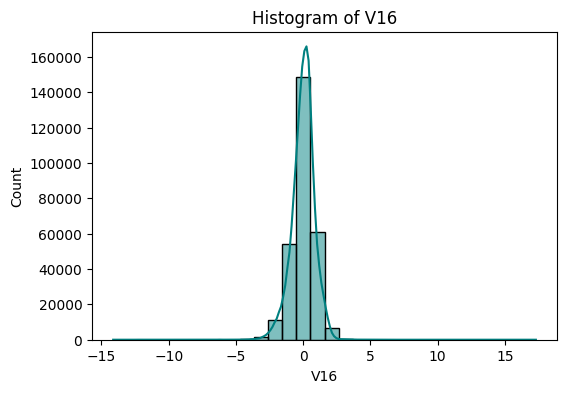

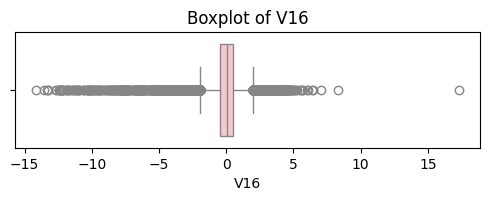


 Summary for V17:
 count    283726.000000
mean          0.000170
std           0.842507
min         -25.162799
25%          -0.483928
50%          -0.065867
75%           0.398972
max           9.253526
Name: V17, dtype: float64


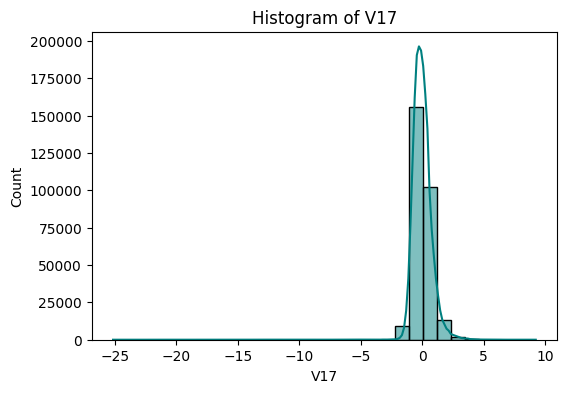

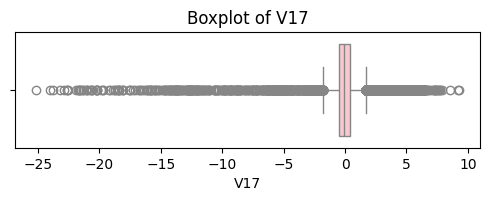


 Summary for V18:
 count    283726.000000
mean          0.001515
std           0.837378
min          -9.498746
25%          -0.498014
50%          -0.002142
75%           0.501956
max           5.041069
Name: V18, dtype: float64


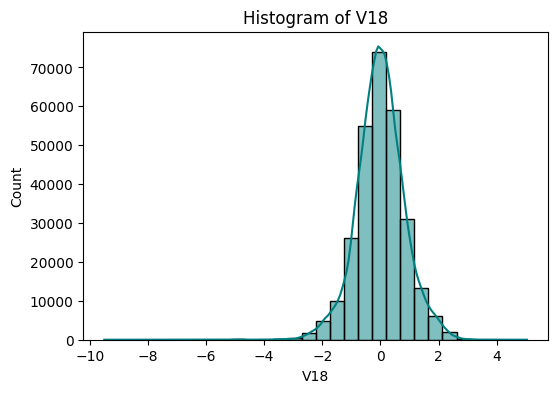

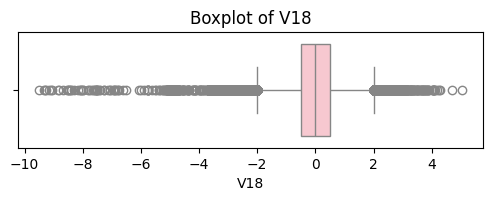


 Summary for V19:
 count    283726.000000
mean         -0.000264
std           0.813379
min          -7.213527
25%          -0.456289
50%           0.003367
75%           0.458508
max           5.591971
Name: V19, dtype: float64


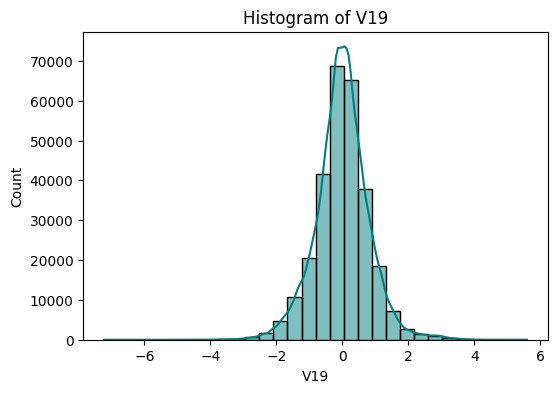

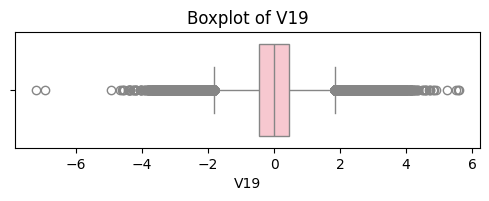


 Summary for V20:
 count    283726.000000
mean          0.000187
std           0.769984
min         -54.497720
25%          -0.211469
50%          -0.062353
75%           0.133207
max          39.420904
Name: V20, dtype: float64


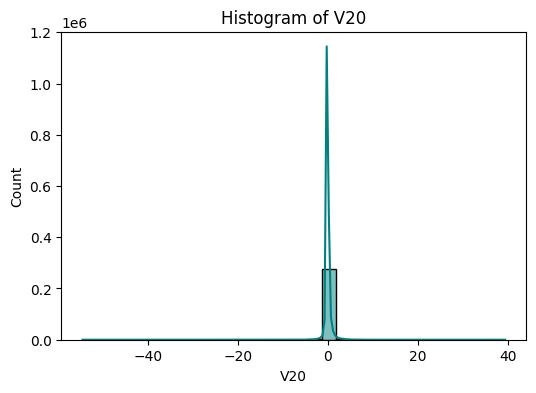

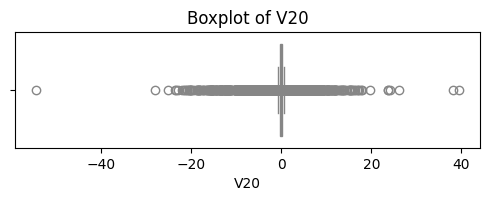


 Summary for V21:
 count    283726.000000
mean         -0.000371
std           0.723909
min         -34.830382
25%          -0.228305
50%          -0.029441
75%           0.186194
max          27.202839
Name: V21, dtype: float64


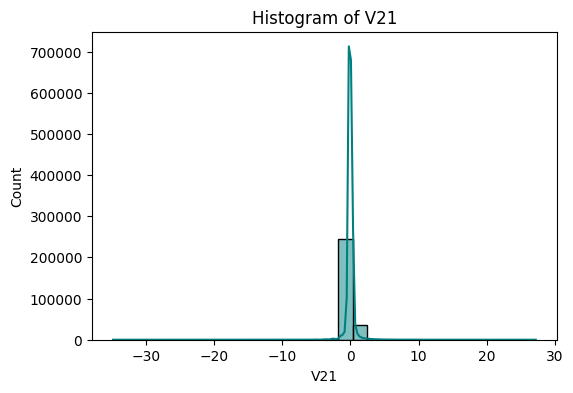

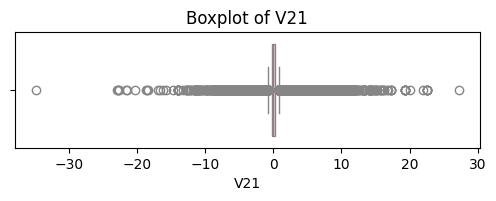


 Summary for V22:
 count    283726.000000
mean         -0.000015
std           0.724550
min         -10.933144
25%          -0.542700
50%           0.006675
75%           0.528245
max          10.503090
Name: V22, dtype: float64


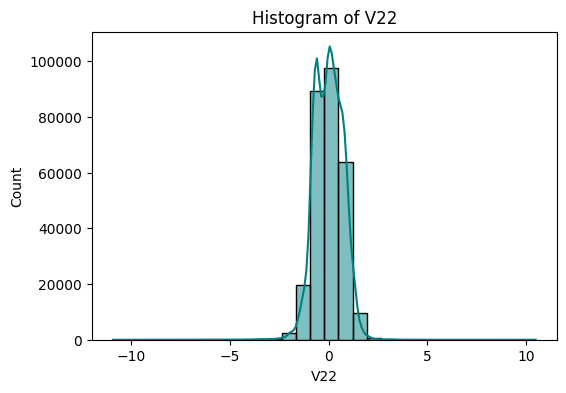

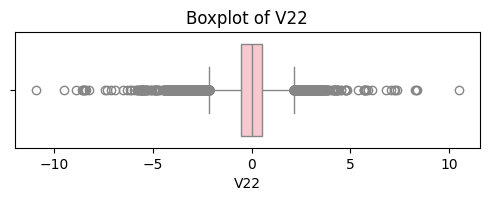


 Summary for V23:
 count    283726.000000
mean          0.000198
std           0.623702
min         -44.807735
25%          -0.161703
50%          -0.011159
75%           0.147748
max          22.528412
Name: V23, dtype: float64


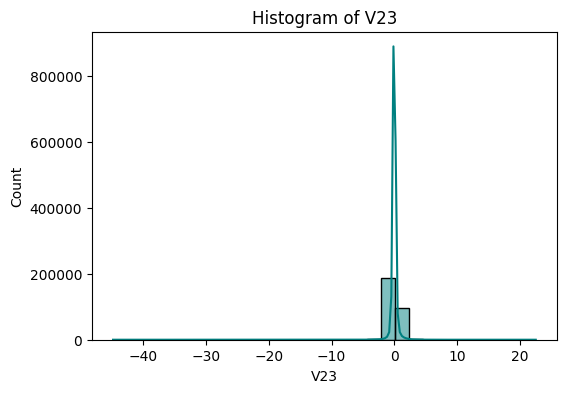

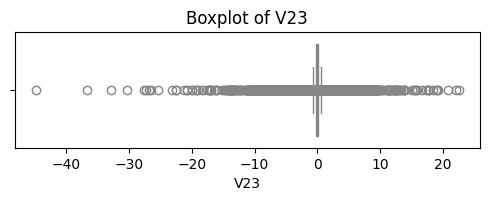


 Summary for V24:
 count    283726.000000
mean          0.000214
std           0.605627
min          -2.836627
25%          -0.354453
50%           0.041016
75%           0.439738
max           4.584549
Name: V24, dtype: float64


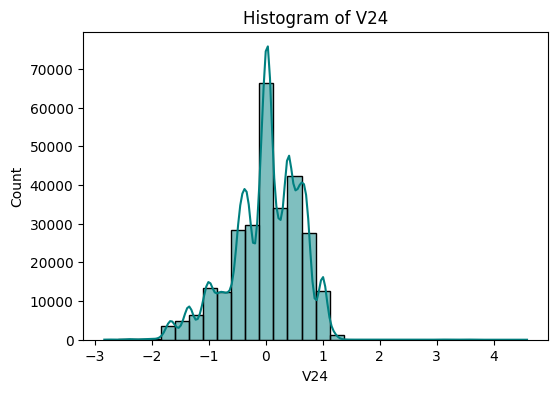

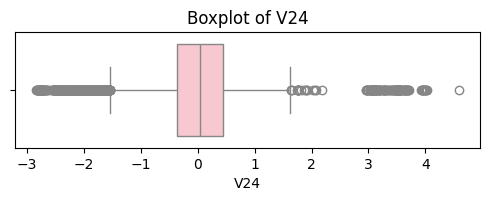


 Summary for V25:
 count    283726.000000
mean         -0.000232
std           0.521220
min         -10.295397
25%          -0.317485
50%           0.016278
75%           0.350667
max           7.519589
Name: V25, dtype: float64


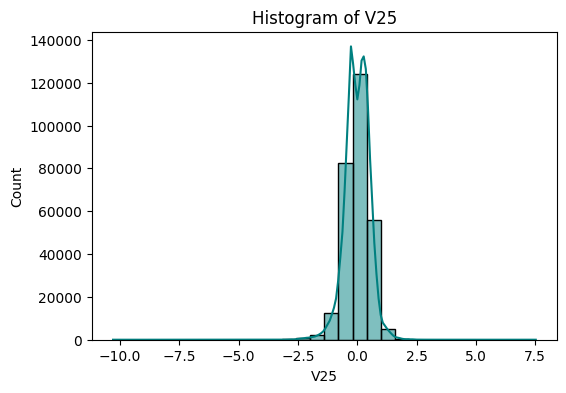

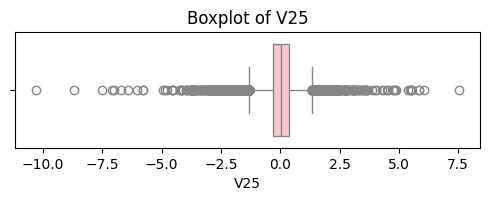


 Summary for V26:
 count    283726.000000
mean          0.000149
std           0.482053
min          -2.604551
25%          -0.326763
50%          -0.052172
75%           0.240261
max           3.517346
Name: V26, dtype: float64


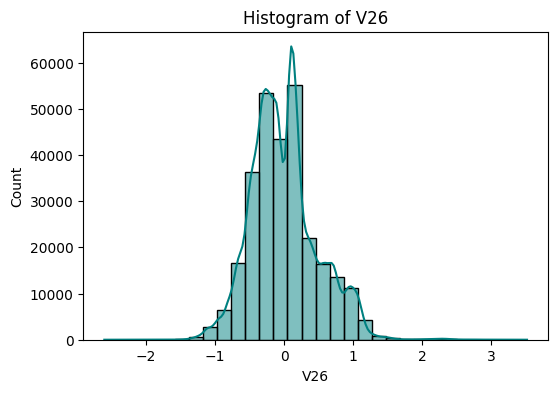

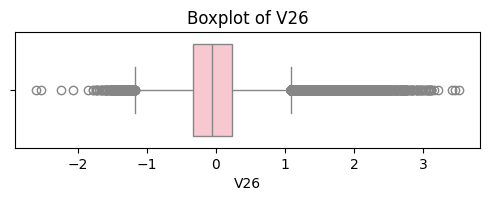


 Summary for V27:
 count    283726.000000
mean          0.001763
std           0.395744
min         -22.565679
25%          -0.070641
50%           0.001479
75%           0.091208
max          31.612198
Name: V27, dtype: float64


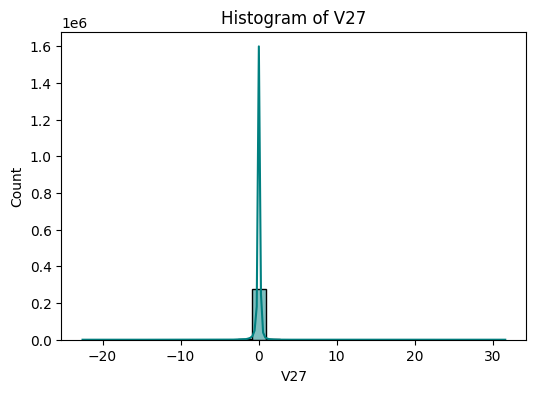

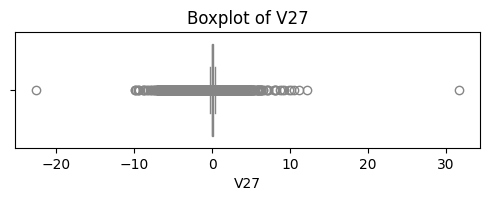


 Summary for V28:
 count    283726.000000
mean          0.000547
std           0.328027
min         -15.430084
25%          -0.052818
50%           0.011288
75%           0.078276
max          33.847808
Name: V28, dtype: float64


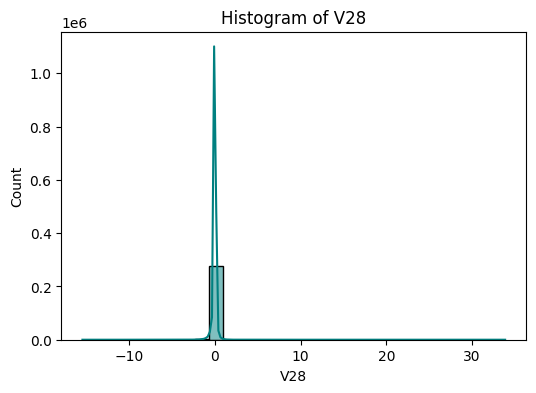

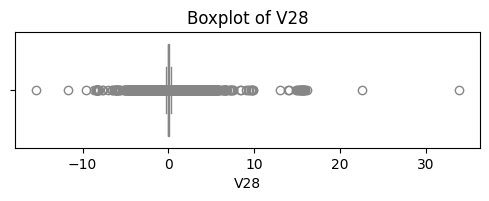


 Summary for Amount:
 count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64


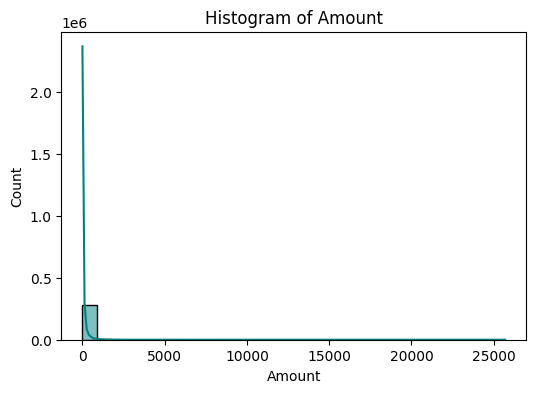

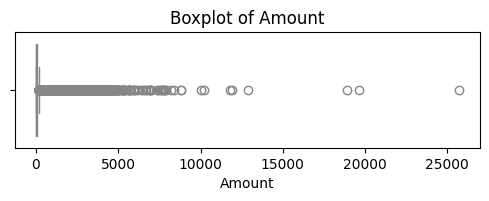


 Summary for Class:
 count    283726.000000
mean          0.001667
std           0.040796
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64


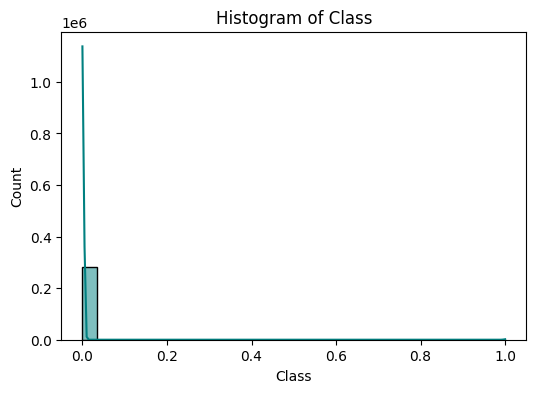

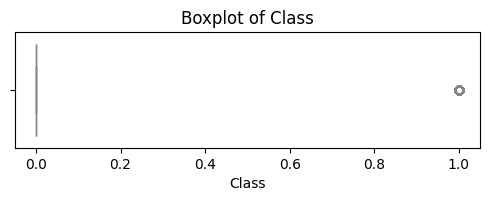


 Missing Values in cc_df:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
#  NUMERICAL
numeric_cols = cc_df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    print(f"\n Summary for {col}:\n", cc_df[col].describe())
    plt.figure(figsize=(6,4))
    sns.histplot(cc_df[col], kde=True, bins=30, color='teal')
    plt.title(f"Histogram of {col}")
    plt.show()

    plt.figure(figsize=(6,1.5))
    sns.boxplot(x=cc_df[col], color='pink')
    plt.title(f"Boxplot of {col}")
    plt.show()

# MISSING
print("\n Missing Values in cc_df:\n", cc_df.isnull().sum())


## 3.2 Bivariant Analaysis

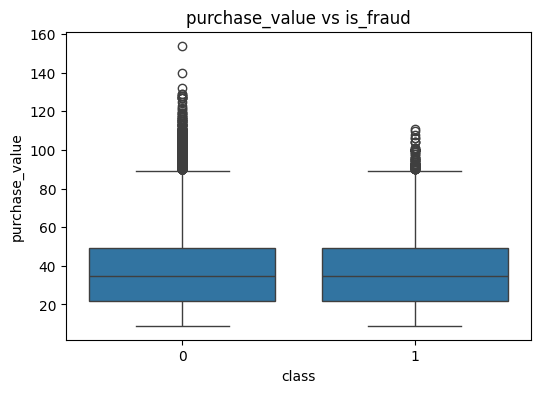

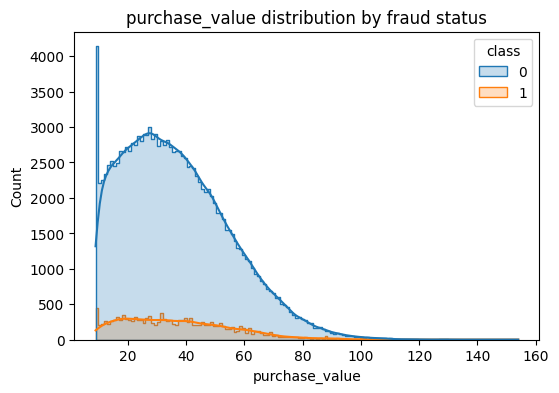

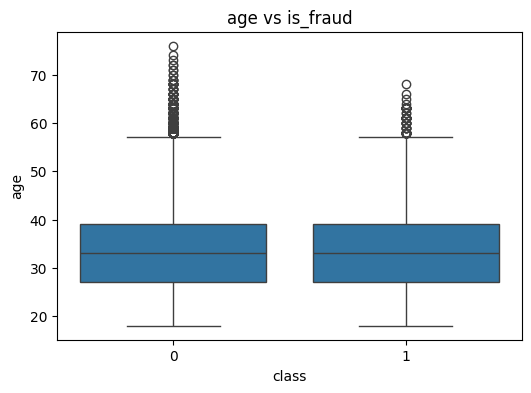

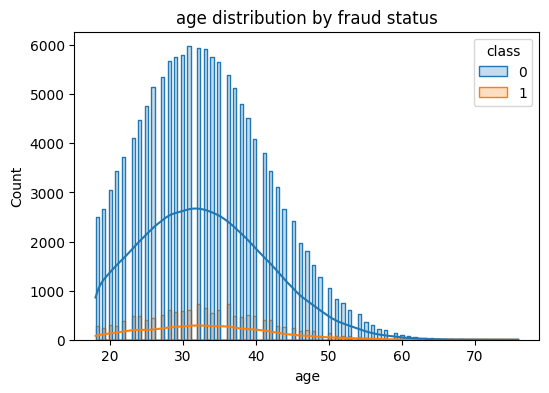

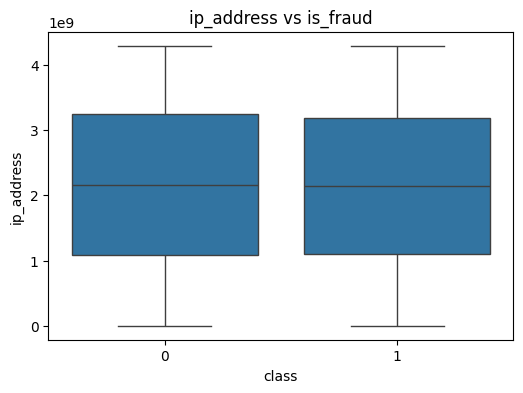

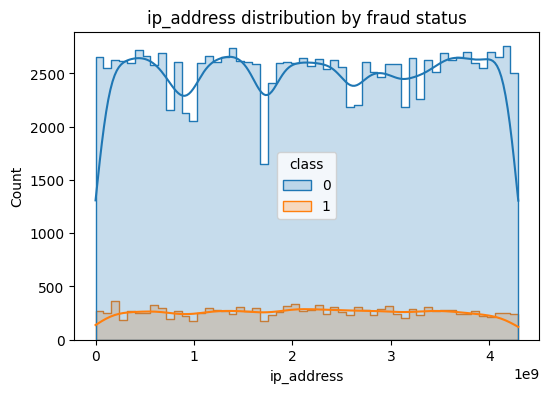

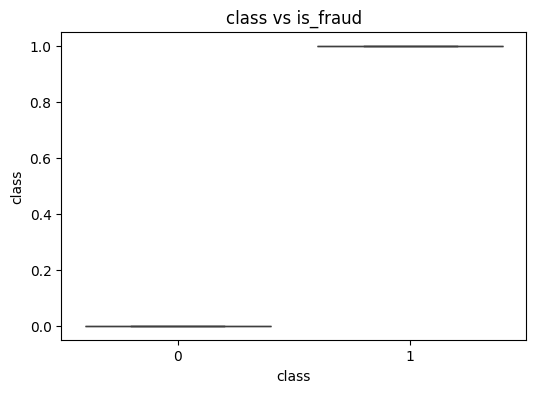

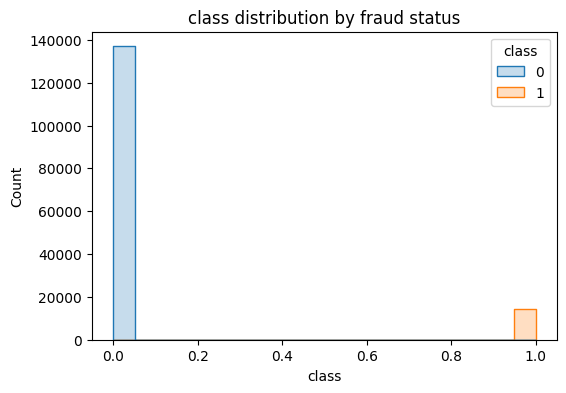

In [ ]:
# Plot numerical columns vs fraud
num_cols = fd_df.select_dtypes(include=['int64', 'float64']).columns.drop('is_fraud', errors='ignore')

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='class', y=col, data=fd_df)
    plt.title(f"{col} vs is_fraud")
    plt.show()

    plt.figure(figsize=(6,4))
    sns.histplot(data=fd_df, x=col, hue='class', kde=True, element="step")
    plt.title(f"{col} distribution by fraud status")
    plt.show()


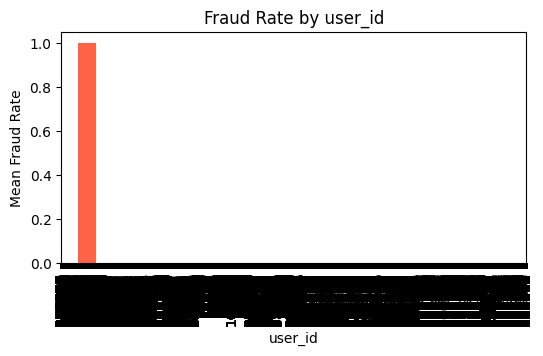

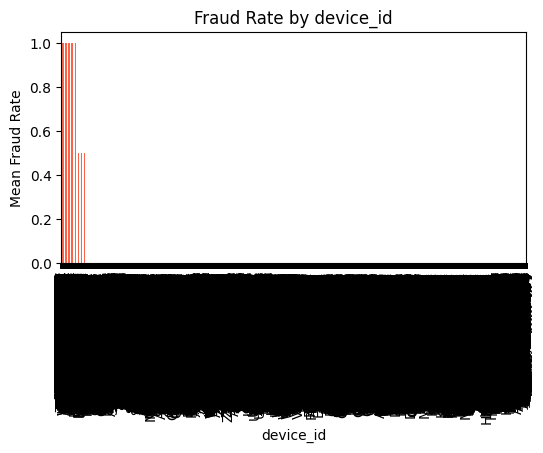

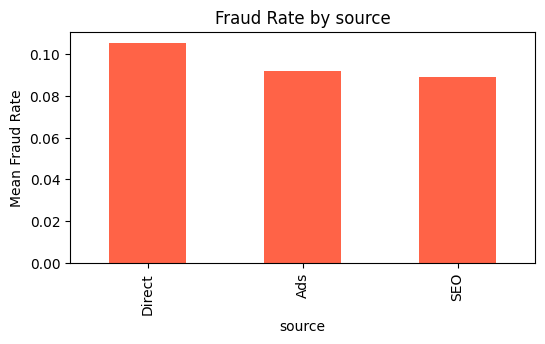

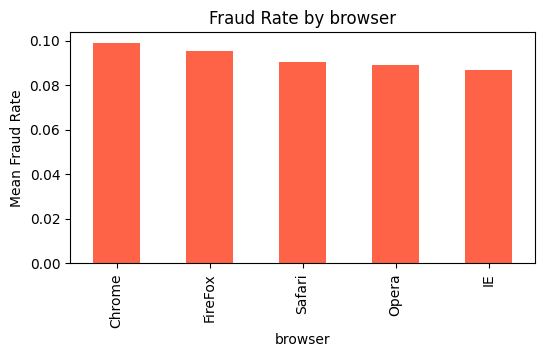

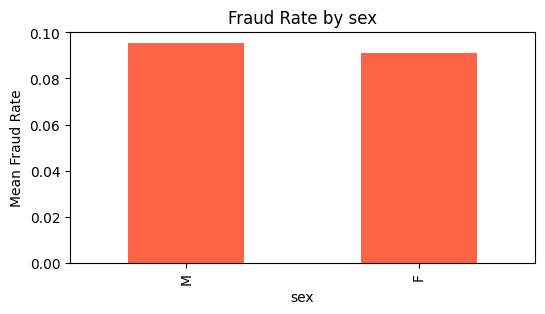

In [ ]:
# Categorical vs Target
cat_cols = fd_df.select_dtypes(include='object').columns

for col in cat_cols:
    plt.figure(figsize=(6,3))
    fraud_rate = fd_df.groupby(col)['class'].mean().sort_values(ascending=False)
    fraud_rate.plot(kind='bar', color='tomato')
    plt.title(f"Fraud Rate by {col}")
    plt.ylabel("Mean Fraud Rate")
    plt.show()


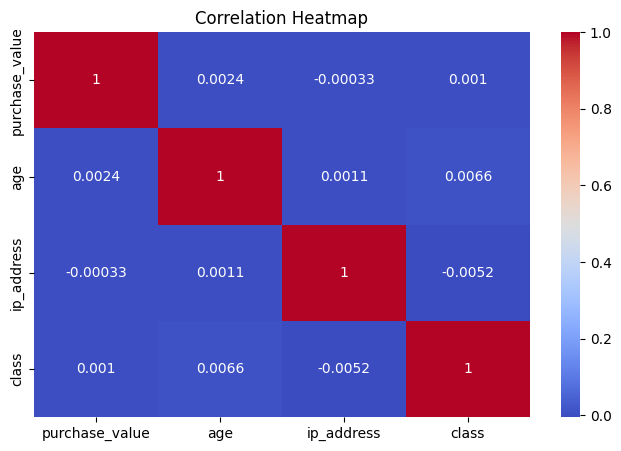

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(fd_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


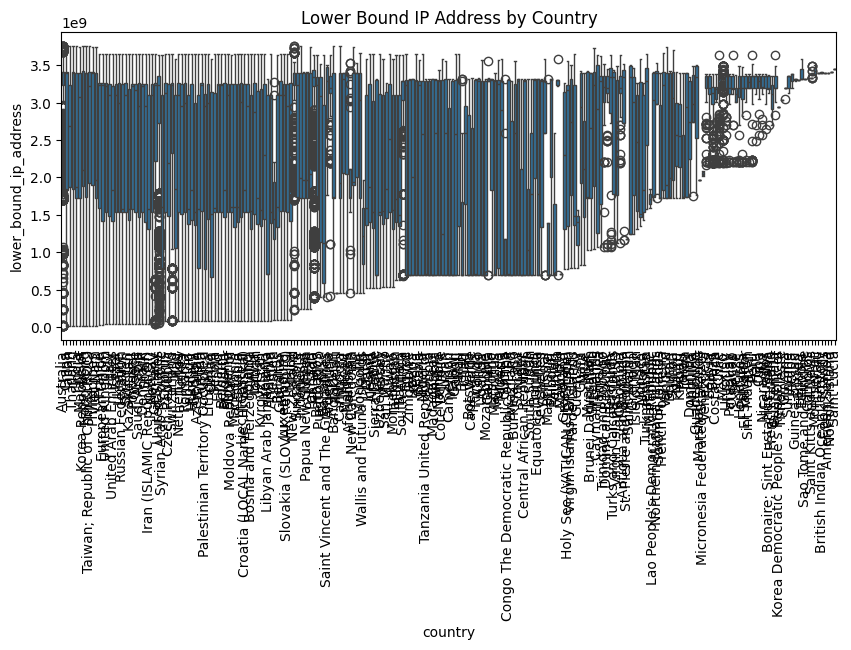

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='country', y='lower_bound_ip_address', data=ip_df)
plt.xticks(rotation=90)
plt.title("Lower Bound IP Address by Country")
plt.show()



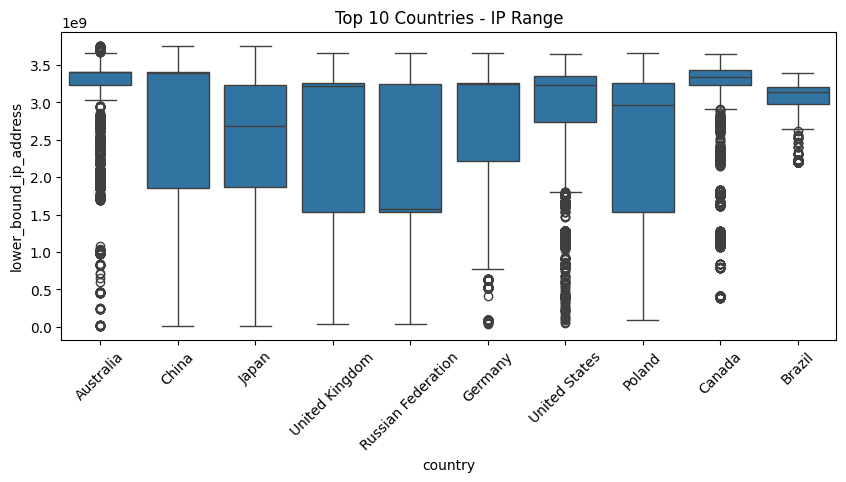

In [ ]:
top_countries = ip_df['country'].value_counts().nlargest(10).index
filtered = ip_df[ip_df['country'].isin(top_countries)]

plt.figure(figsize=(10,4))
sns.boxplot(x='country', y='lower_bound_ip_address', data=filtered)
plt.xticks(rotation=45)
plt.title("Top 10 Countries - IP Range")
plt.show()


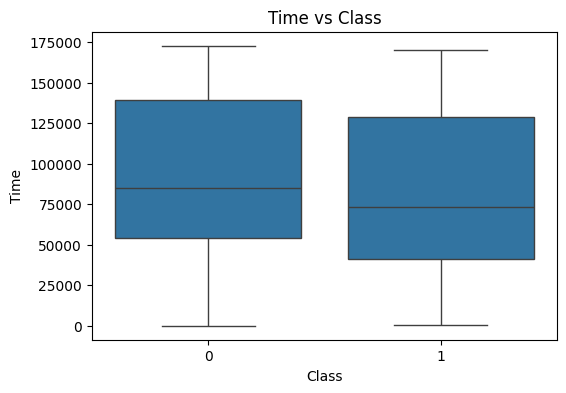

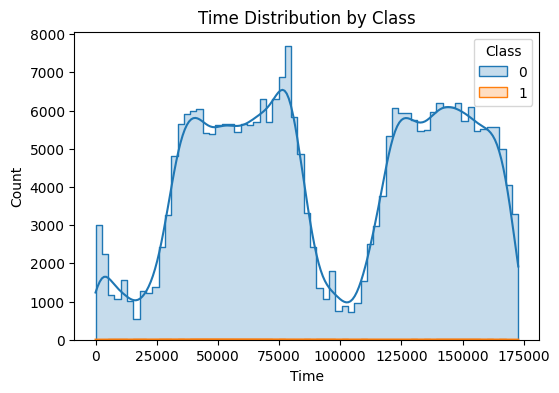

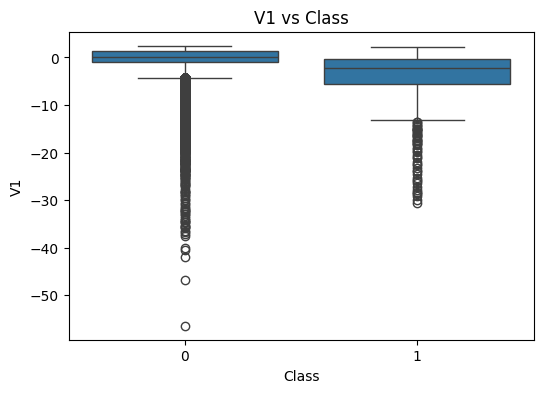

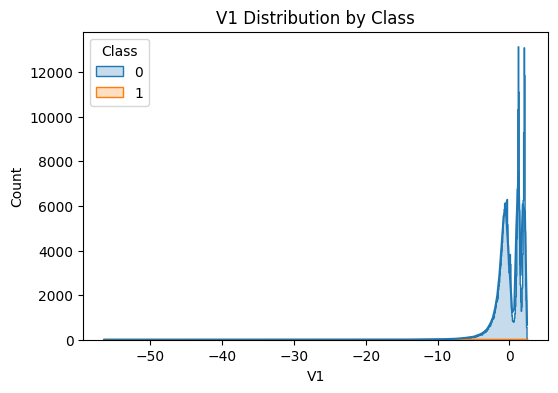

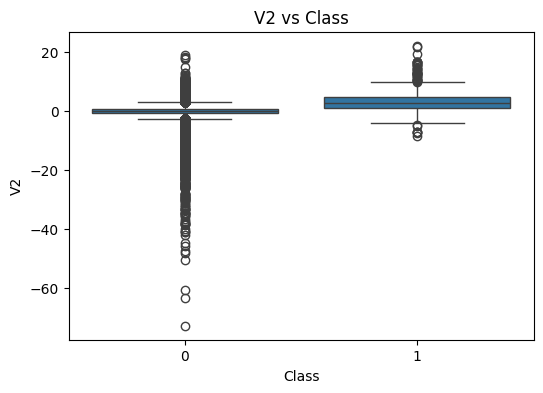

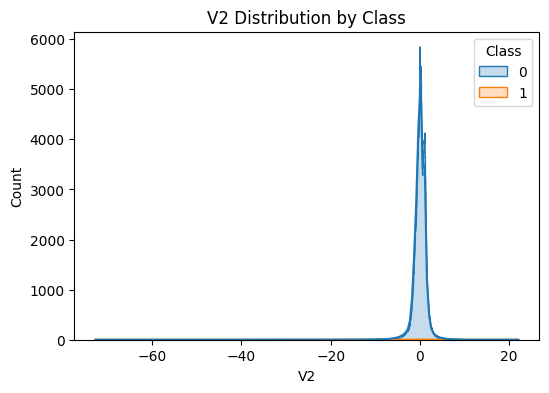

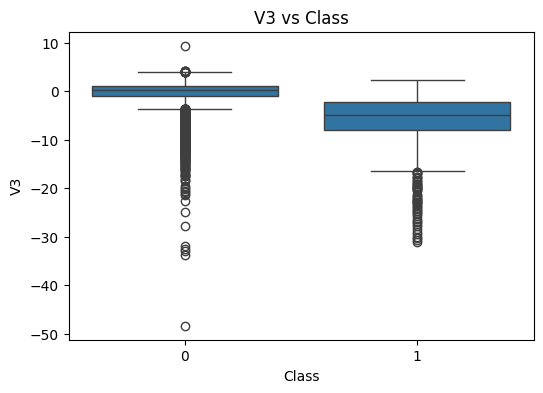

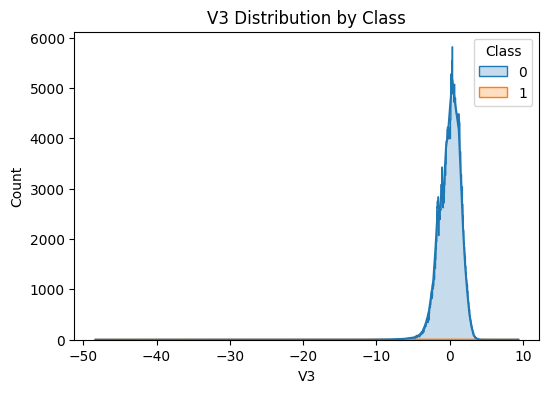

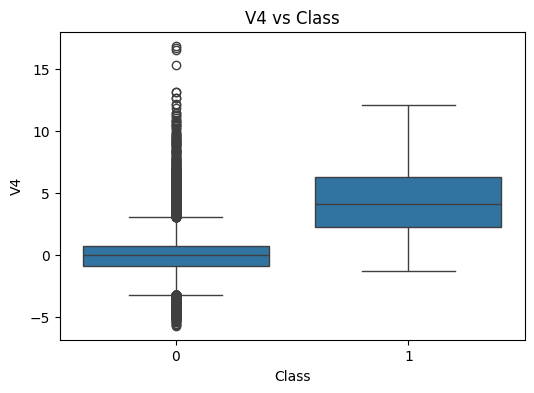

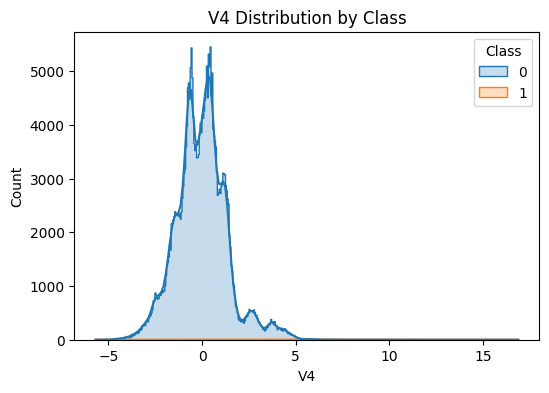

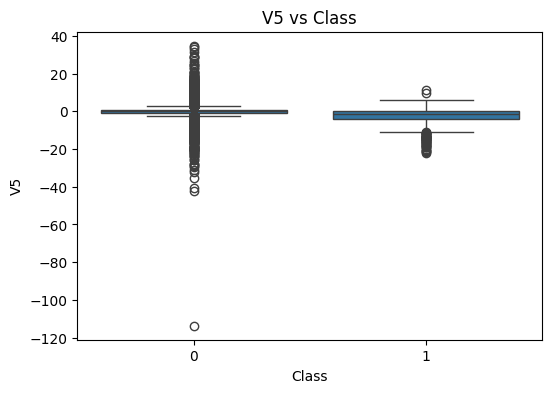

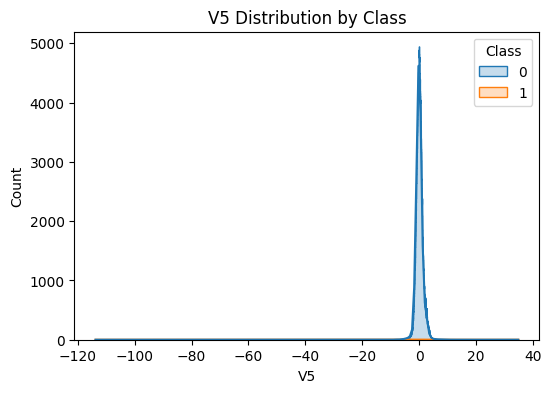

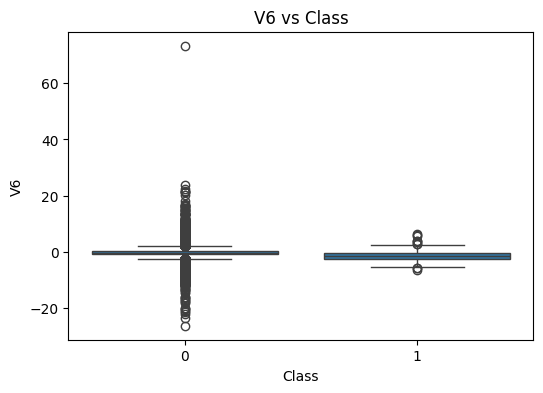

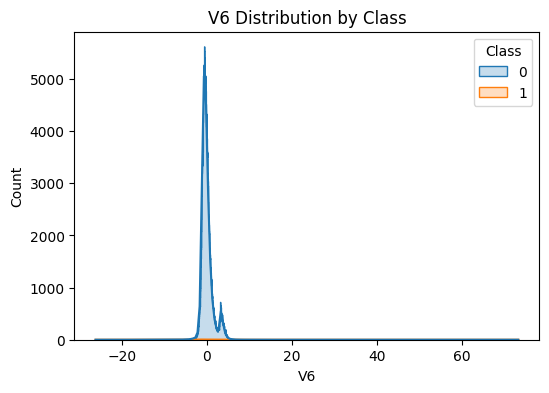

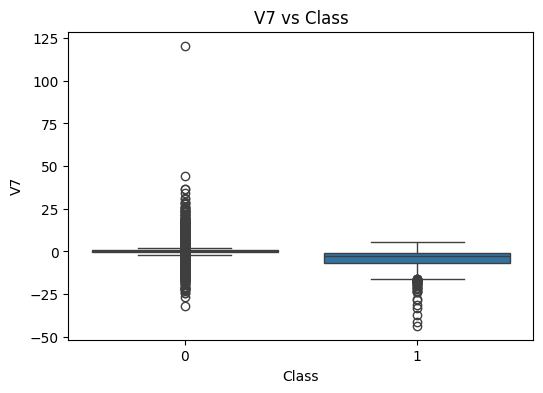

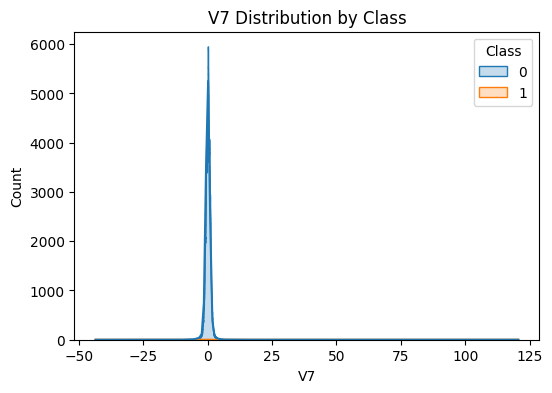

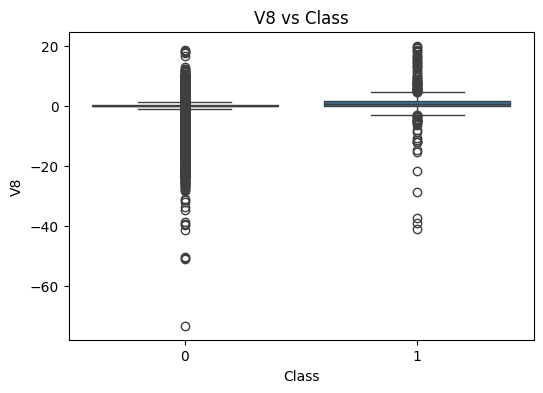

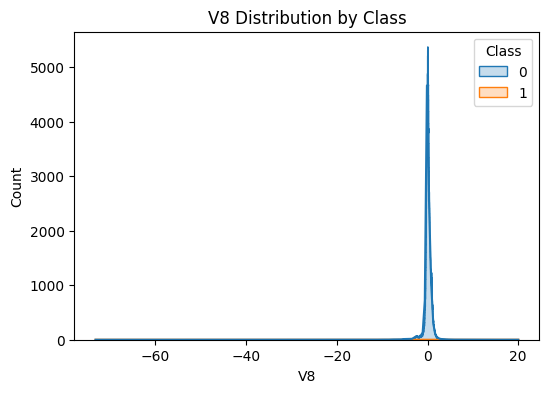

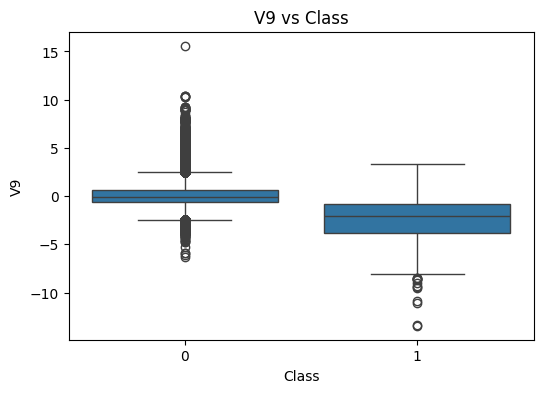

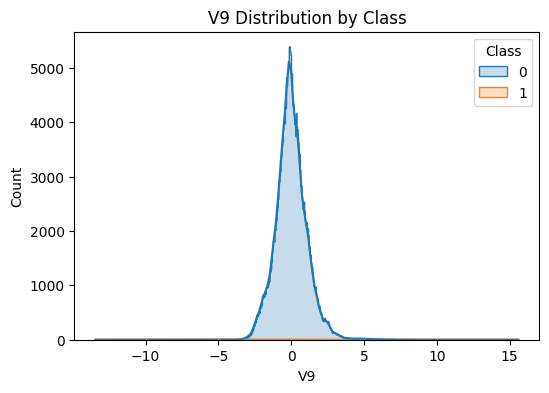

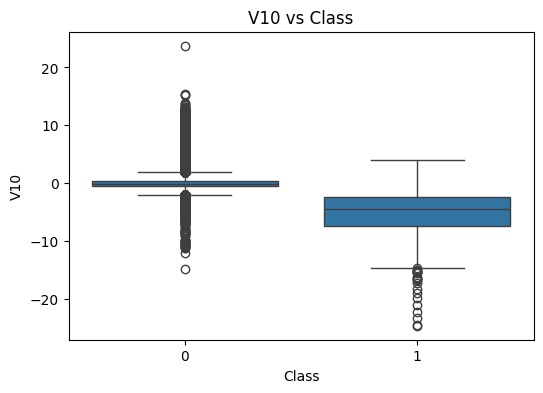

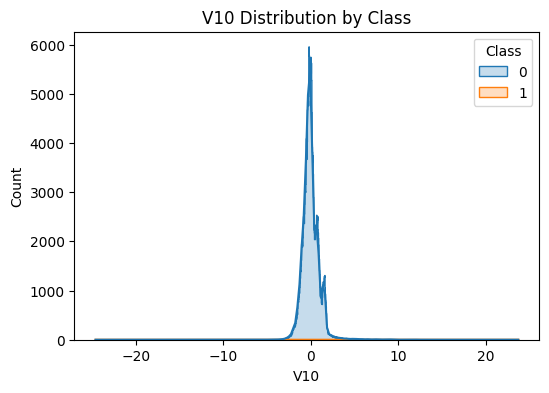

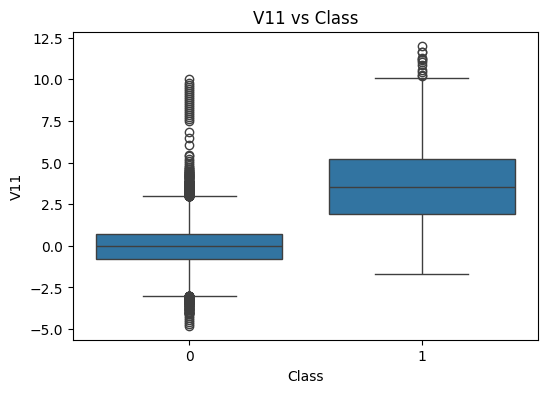

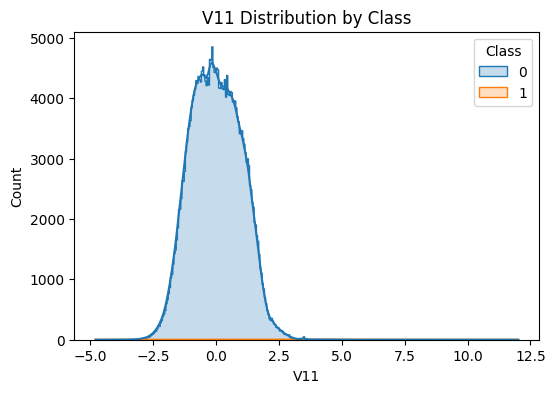

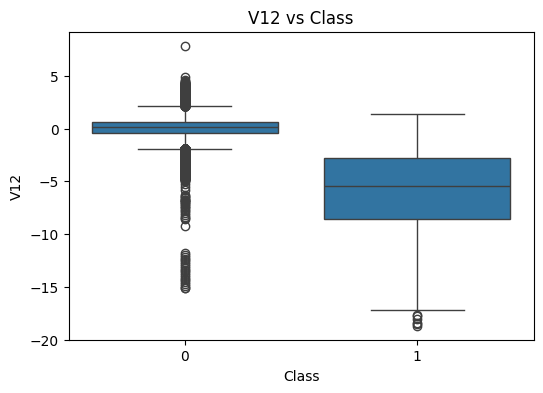

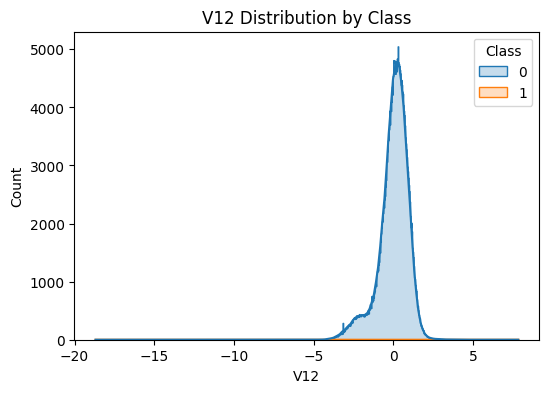

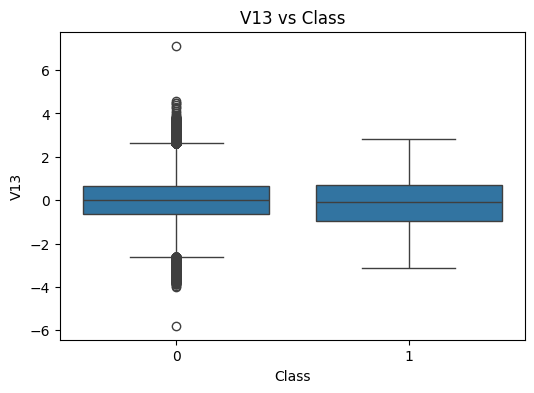

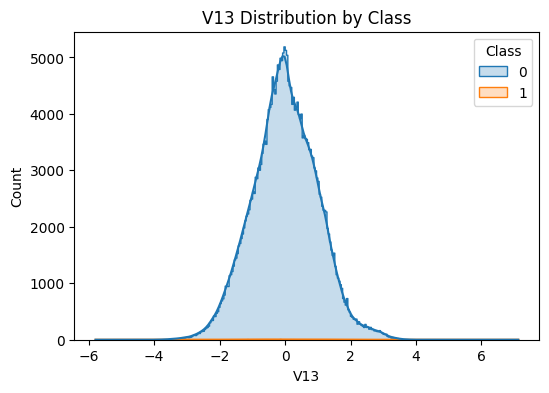

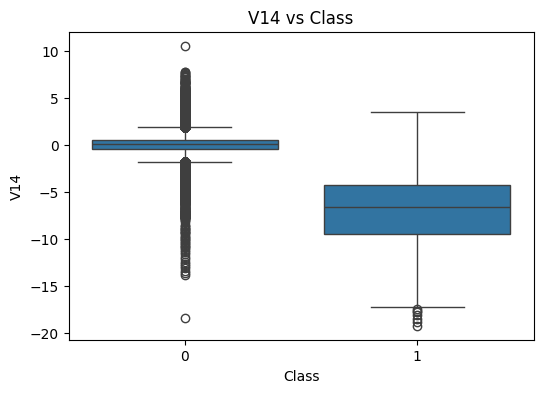

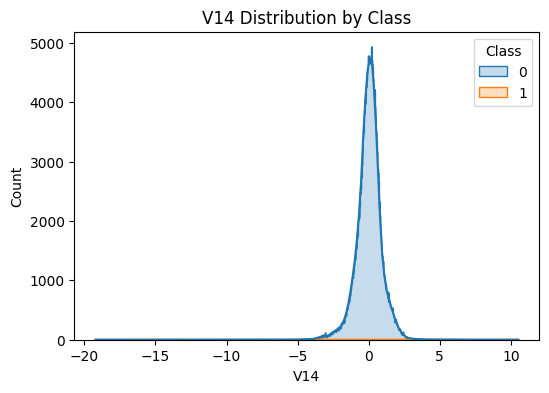

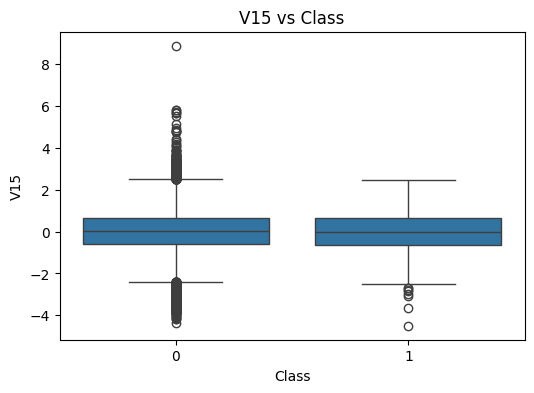

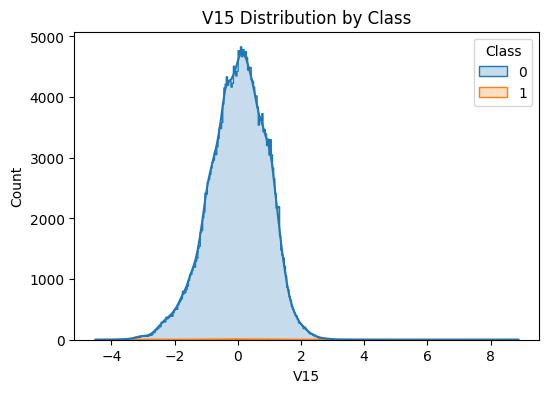

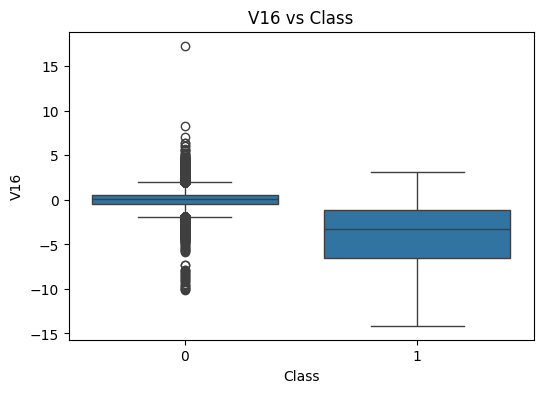

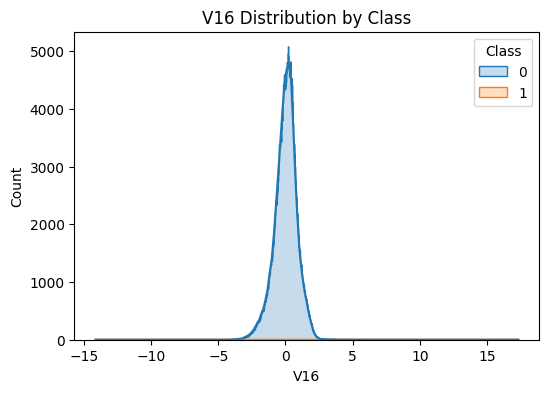

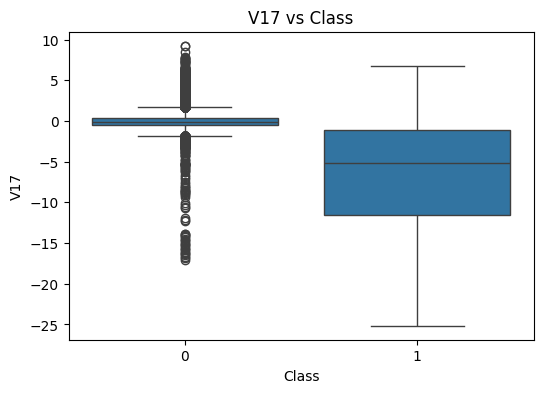

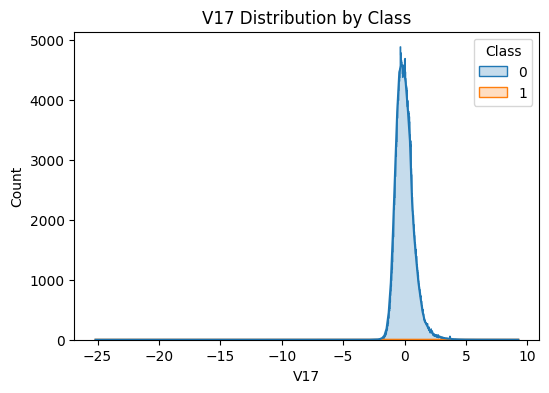

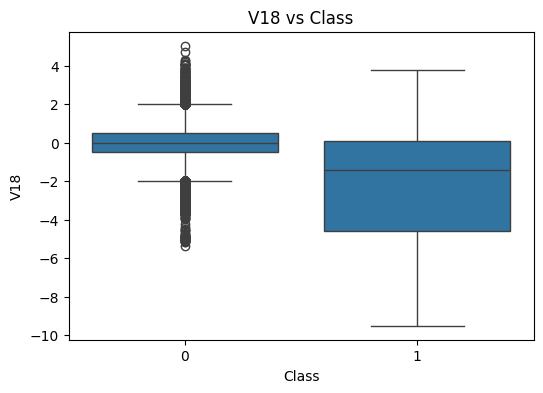

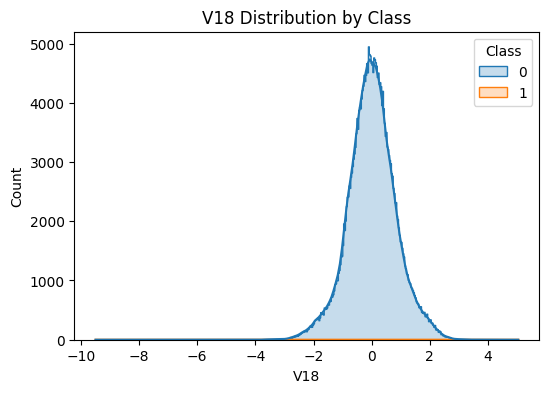

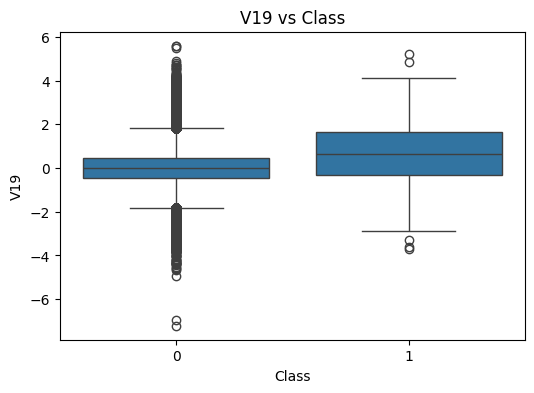

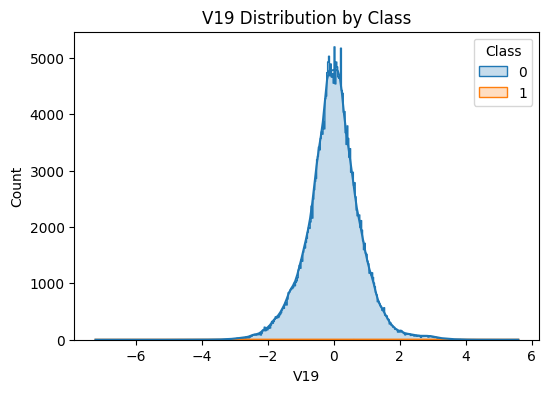

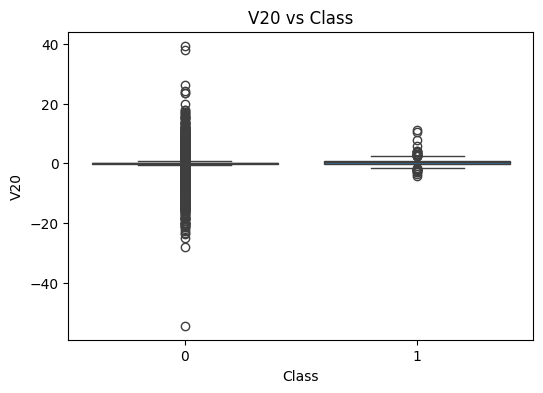

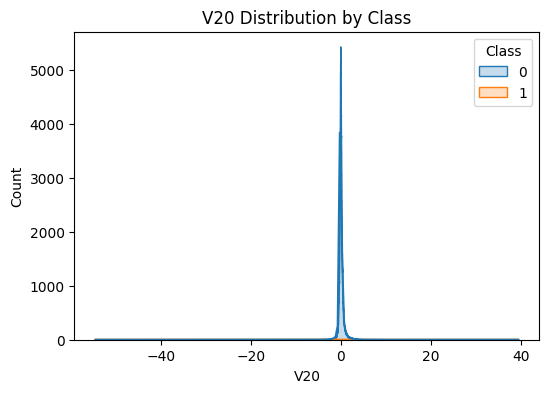

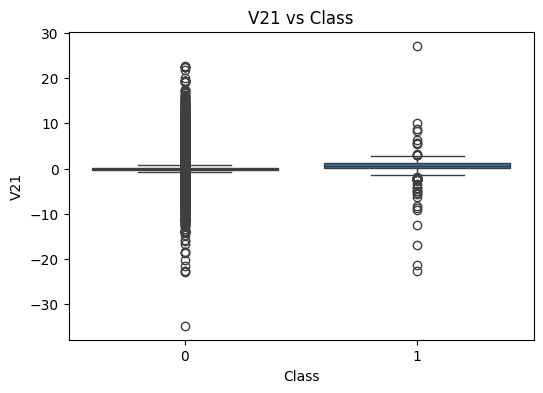

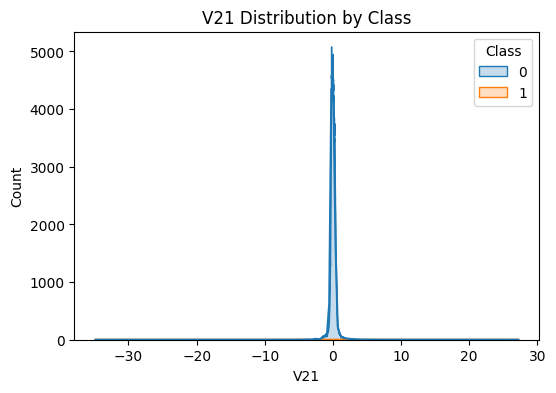

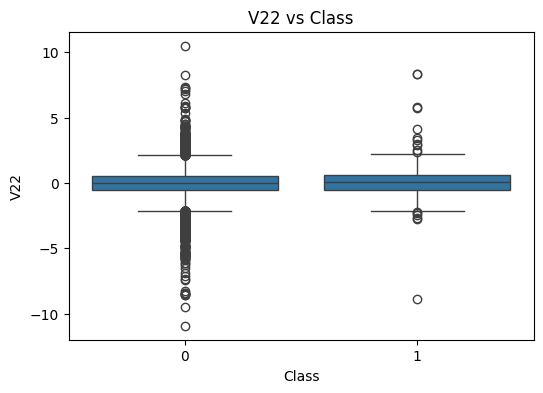

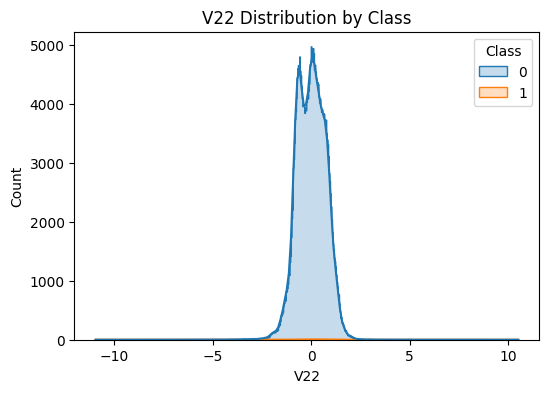

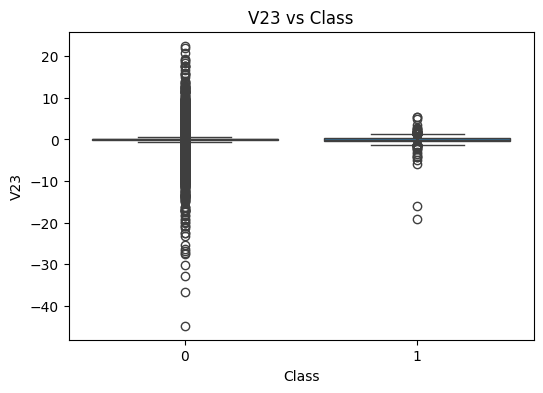

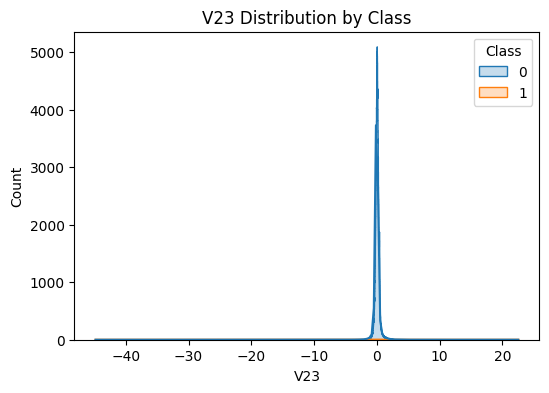

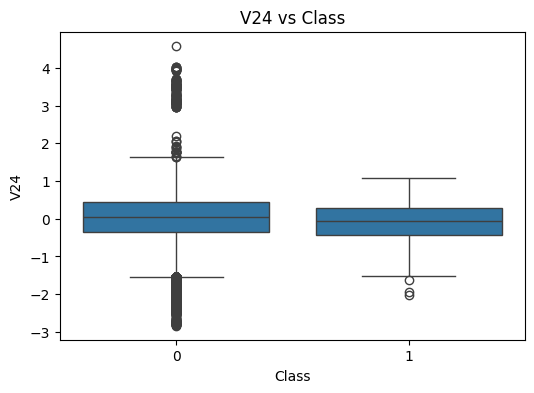

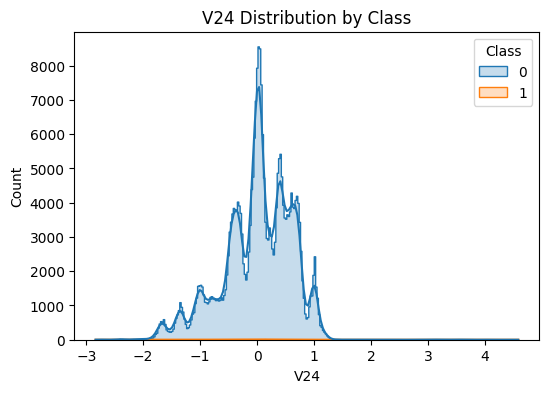

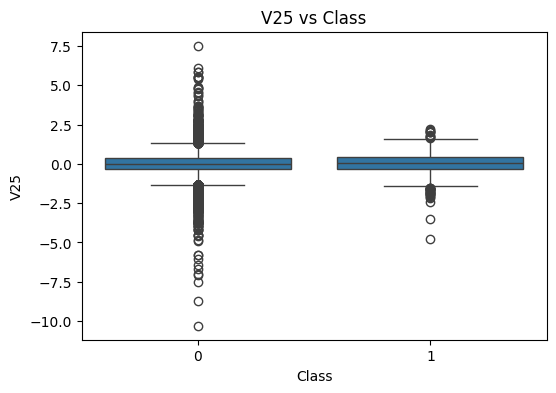

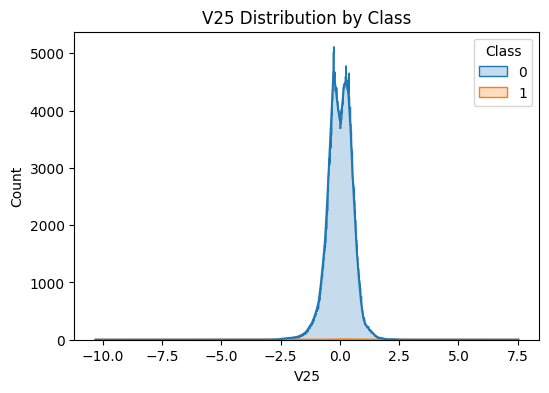

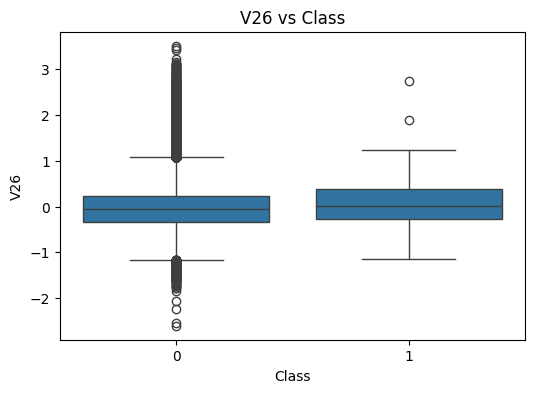

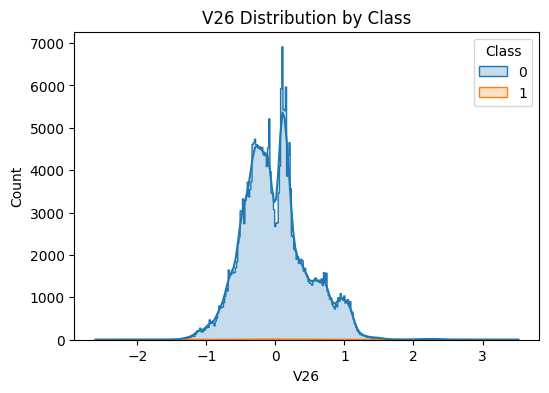

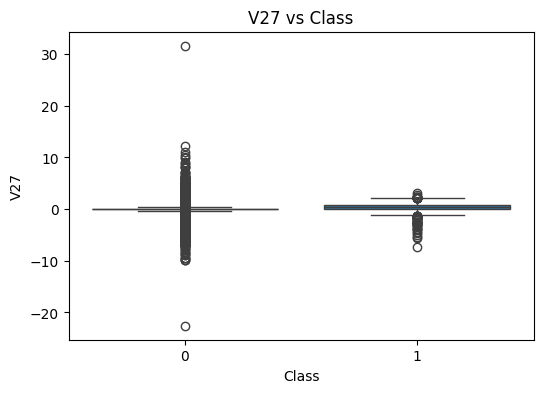

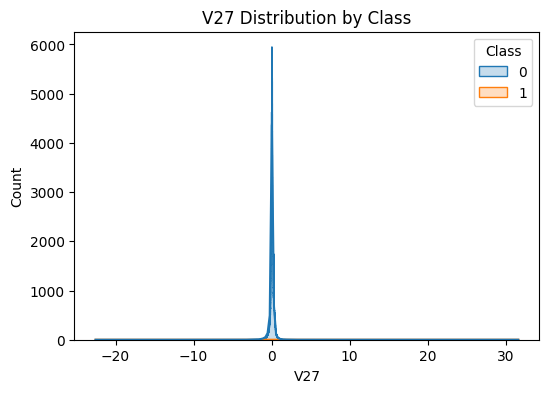

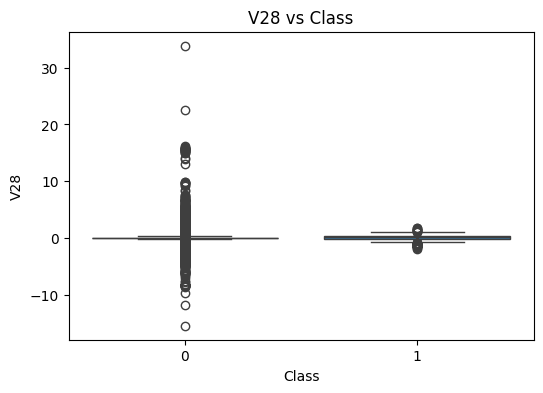

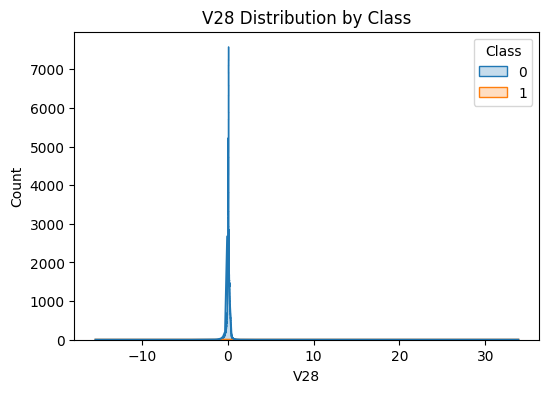

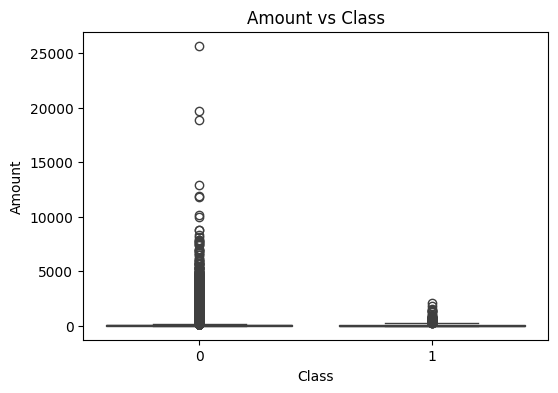

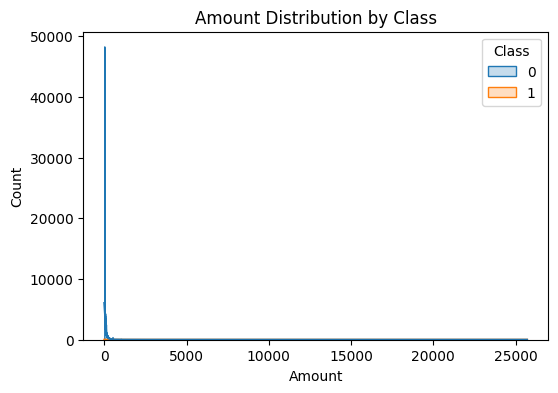

In [ ]:
num_cols = cc_df.select_dtypes(include=['int64', 'float64']).columns.drop('Class', errors='ignore')

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Class', y=col, data=cc_df)
    plt.title(f"{col} vs Class")
    plt.show()

    plt.figure(figsize=(6,4))
    sns.histplot(data=cc_df, x=col, hue='Class', kde=True, element="step")
    plt.title(f"{col} Distribution by Class")
    plt.show()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,transaction_frequency,transaction_velocity,hour_of_day,day_of_week,time_since_signup


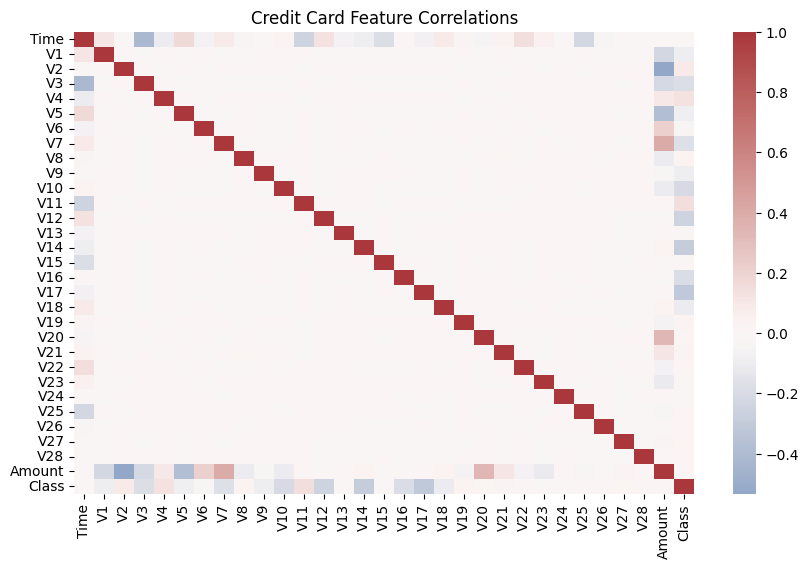

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(cc_df.corr(numeric_only=True), cmap='vlag', center=0)
plt.title("Credit Card Feature Correlations")
plt.show()

##  Merge Datasets for Geolocation Analysis

In [16]:
# Convert IP Address to Integer
import ipaddress

def ip_to_int(ip):
    try:
        return int(ipaddress.IPv4Address(ip))
    except:
        return None
fd_df['ip_address'] = fd_df['ip_address'].apply(ip_to_int)
ip_df['lower_bound_ip_address'] = ip_df['lower_bound_ip_address'].astype(int)
ip_df['upper_bound_ip_address'] = ip_df['upper_bound_ip_address'].astype(int)
# Merge Using IP Range
def get_country_for_ip(ip):
    match = ip_df[(ip_df['lower_bound_ip_address'] <= ip) & (ip_df['upper_bound_ip_address'] >= ip)]
    if not match.empty:
        return match.iloc[0]['country']
    else:
        return None

# Apply the function
fd_df['country'] = fd_df['ip_address'].apply(get_country_for_ip)

In [17]:
ip_intervals = pd.IntervalIndex.from_arrays(ip_df['lower_bound_ip_address'], ip_df['upper_bound_ip_address'], closed='both')

def get_country(ip):
    try:
        idx = ip_intervals.get_loc(ip)
        return ip_df.iloc[idx]['country']
    except KeyError:
        return None

fd_df['country'] = fd_df['ip_address'].apply(get_country)


## 5.	Feature Engineering

In [18]:
# Frequency: number of transactions per user
fd_df['transaction_frequency'] = fd_df.groupby('user_id')['user_id'].transform('count')

# Velocity: time difference between two consecutive transactions of same user
fd_df.sort_values(['user_id', 'purchase_time'], inplace=True)
fd_df['transaction_velocity'] = fd_df.groupby('user_id')['purchase_time'].diff().dt.total_seconds()

# Fill NaN with median for first purchase
fd_df['transaction_velocity'].fillna(fd_df['transaction_velocity'].median(), inplace=True)

/tmp/ipython-input-18-571069080.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fd_df['transaction_velocity'].fillna(fd_df['transaction_velocity'].median(), inplace=True)


In [19]:
# Hour of Day
fd_df['hour_of_day'] = fd_df['purchase_time'].dt.hour

# Day of Week
fd_df['day_of_week'] = fd_df['purchase_time'].dt.dayofweek  # Monday=0, Sunday=6

# Time since signup (in hours)
fd_df['time_since_signup'] = (fd_df['purchase_time'] - fd_df['signup_time']).dt.total_seconds() / 3600

## 6: Data Transformation

In [20]:
# Check class distribution
print(fd_df['class'].value_counts(normalize=True))

class
0    0.906354
1    0.093646
Name: proportion, dtype: float64


In [21]:
# Separate Features & Target
X = fd_df.drop('class', axis=1)
y = fd_df['class']

In [27]:

# Separate numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Numeric pipeline: impute missing with median
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Categorical pipeline: impute missing with mode, then one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Combine pipelines
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Create pipeline including SMOTE after preprocessing
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42))
])

# Fit and resample training data
X_train_bal, y_train_bal = pipeline.fit_resample(X_train, y_train)

# Transform test data only (no SMOTE on test)
X_test_transformed = preprocessor.transform(X_test)



/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['transaction_velocity']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['transaction_velocity']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [28]:
fd_df.to_csv("fraud_data_preprocessed.csv", index=False)
cc_df.to_csv("credir_data_preprocessed.csv", index=False)